# **Projeto de Análise e Previsão de Satisfação do Cliente em Empresas de Fast Food**
---

In [2]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Joao vitor quirino Sarti, 18.01224-8' #@param {type:"string"}
Aluno2 = 'Matheus Rossini, 18.01060-0' #@param {type:"string"}
Aluno3 = 'Guilherme Costa, 19.00065-0' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}

Opcao_de_projeto = 1 #@param {type:"number"} # eu acho que fica como opção 1 e 2 mas nao sei qual colocar



### **Resumo**

O projeto foca na análise da satisfação do cliente em empresas de fast food, visando prever o impacto de eventos específicos nessa satisfação. Com a análise de dados de comentários de clientes e eventos ocorridos nas empresas, identifica-se a relação entre ações e a satisfação do cliente. Um modelo de machine learning foi treinado para prever essa satisfação, revelando que mudanças significativas, como alterações de receitas, tendem a impactar negativamente a percepção do cliente.

### **Descrição do Problema**

O projeto aborda a importância de compreender como eventos empresariais influenciam a satisfação do cliente em empresas de fast food. Identificar mudanças nas percepções dos clientes em resposta a ações específicas, como modificações de receitas ou campanhas publicitárias, é crucial para orientar as estratégias das empresas, visando melhorar a experiência do cliente e aprimorar suas práticas.

### **Metodologia Aplicada**

A metodologia envolveu a coleta de dados de diversas fontes, análise exploratória, categorização de eventos, visualização de dados, pré-processamento dos dados para o modelo de machine learning e treinamento de uma rede neural usando TensorFlow e Keras. O modelo foi avaliado utilizando métricas como acurácia, precisão e recall.

### **Resultados**

O modelo alcançou aproximadamente 66% de acurácia, com desempenho variado em diferentes categorias de satisfação do cliente. Notavelmente, mudanças substanciais, como modificações de receitas, foram identificadas como tendo um impacto mais negativo na satisfação do cliente, fornecendo informações valiosas para as empresas.

### **Conclusão**

O projeto foi capaz de mostrar que certos eventos têm maior influência na satisfação do cliente em empresas de fast food, especialmente alterações significativas. Embora o modelo tenha atingido resultados satisfatórios, algumas categorias de satisfação do cliente foram previstas com maior precisão do que outras. Para melhorar, seria fundamental considerar outros fatores e possivelmente aprimorar o modelo de machine learning.

### **Referências**

As fontes utilizadas para este projeto incluem informações de eventos de empresas específicas, pesquisas em notícias corporativas e referências acadêmicas. Além disso, foram exploradas referências de busca como Bing e Reddit, bem como fontes confiáveis como sites corporativos e acadêmicos.

Origem:
(1) The timeline of Nestlé’s company history - Nestlé Global. https://www.nestle.com/about/history/nestle-company-history.
(2) Nestlé Brasil: Seja bem-vindo! | Nestlé. https://www.nestle.com.br/.
(3) Our latest news | Nestlé Global. https://www.nestle.com/media/news.
(4) Our latest news | Nestlé Global. https://bing.com/search?q=Nestl%c3%a9+events+recent.
(5) Nestlé press releases| Nestlé Global. https://www.nestle.com/media/pressreleases.
(6) Publication of 2015 Annual Report | Nestlé Global. https://www.nestle.com/media/mediaeventscalendar/allevents/2015-annual-report.
(7) Nestlé Investors | Nestlé Global. https://www.nestle.com/investors.
(8) McDonald's Versus Burger King Versus Starbucks Versus Subway | Time. https://time.com/3847781/fast-food/.
(9) Yum! Brands - Wikipedia. https://en.wikipedia.org/wiki/Yum!_Brands.
(10) QSR brand value: Marketing mix dimensions among McDonald’s, KFC, Burger .... https://www.emerald.com/insight/content/doi/10.1108/IJCHM-06-2015-0300/full/html.
(11) https://en.wikipedia.org/wiki/Yum.

(12)  https://bing.com/search?q=Coca-Cola+events+from+2015+to+present [Accessed 7 Oct. 2023].
(13)  https://bing.com/search?q=Pepsi+events+from+2015+to+present [Accessed 7 Oct. 2023].
(14)  https://bing.com/search?q=Nestl%C3%A9+events+from+2015+to+present [Accessed 7 Oct. 2023].
(15)  https://bing.com/search?q=Domino%27s+Pizza+events+from+2015+to+present [Accessed 7 Oct. 2023].
(16)  https://www.reddit.com/r/ChatGPT/comments/1116sf5/how_does_microsoft_show_references_in_the_new/.
(17)  James Cook University. https://libanswers.jcu.edu.au/faq/273413.
(18)  https://www.microsoft.com/en-us/edge/features/bing-chat.

# **Vídeo**
	
https://github.com/T2-Ciencia-de-dados/Analise-de-sentimento <-- Organização GitHub
https://github.com/T2-Ciencia-de-dados/Analise-de-sentimento/blob/main/README.md <-- Readme Explicando o projeto além do colab
https://youtu.be/lyH6sa2hq_Y <-- Vídeo explicando partes do código
https://youtu.be/yrzvwIqLrqw <-- Vídeo menor para caber no tempo descrito no Moodle

In [5]:
import praw
from datetime import datetime, timedelta
from transformers import pipeline
import matplotlib.pyplot as plt
import pandas as pd

In [515]:
reddit_client_id = ''
reddit_client_secret = ''
reddit_username = ''
reddit_password = ''
reddit_user_agent = ''

In [516]:
# Configurando as credenciais do Reddit
reddit = praw.Reddit(
    client_id=reddit_client_id,
    client_secret=reddit_client_secret,
    username=reddit_username,
    password=reddit_password,
    user_agent=reddit_user_agent
)

# Carregando o modelo de análise de sentimentos
Classificador = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Busca dos dados via API do Reddit, para o ano de 2015 ate 2023 e Analise do sentimento com bert-base-multilingual-uncased-sentiment, Tokenização das postagens com nltk e limpeza/tratamento dos dados obtidos

### Importação de Bibliotecas e Configuração Inicial:

###### Nesta seção, estamos importando as bibliotecas necessárias, como pandas para manipulação de dados, datetime para lidar com datas, nltk para processamento de linguagem natural, e outras. Além disso, estamos baixando recursos adicionais, como stopwords e o tokenizer punkt do NLTK.

### Definição de Palavras-Chave e Parâmetros de Busca:

######  Aqui, definimos as palavras-chave relacionadas a empresas no Reddit, o intervalo de datas desejado, e o número máximo de posts a serem coletados por empresa.
### Coleta de Dados do Reddit e Análise de Sentimento:

###### Nesta parte, estamos iterando sobre cada empresa, buscando posts relacionados a ela no Reddit. Para cada post, realizamos a limpeza do texto, análise de sentimento e armazenamos os resultados em um dicionário.
### Função para Limpeza de Texto:

###### A função limpar_texto é responsável por tokenizar, remover pontuações, stopwords e converter o texto para minúsculas. Isso é feito para preparar o texto para análise.
### Criação do DataFrame Final:

###### No final, criamos um DataFrame do pandas a partir do dicionário gerado durante a coleta de dados. Este DataFrame contém informações sobre a data, empresa e sentimento associado a cada post.

In [517]:
import pandas as pd
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Baixando as stop words e o punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Palavras-chave de busca no Reddit (Empresas com ramos similares)
empresas = ['CocaCola', 'Pepsi', 'McDonalds', 'BurgerKing', 'KFC', 'PizzaHut', 'Subway', 'Starbucks', 'Nestle', 'Dominos']
ano_de_inicio = datetime(2015, 1, 1)
ano_final = datetime(2023, 10, 1)
num_posts_por_subreddit = 5000 #(o maximo é 100 mas deixei 5000)

# Coleta de Dados do Reddit e Análise de Sentimento
data = {'date': [], 'company': [], 'sentiment': []}

#Função para a limpeza do texto
def limpar_texto(text):
    # Tokenização
    tokens = word_tokenize(text)
    
    # Remoção de pontuações e caracteres especiais
    tokens = [word for word in tokens if word.isalnum()]

    # Remoção de stopwords (como os comentarios sao em ingles os stopwords sao tambem)
    stop_words = set(stopwords.words('english')) # lista de stop words a ser removida
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Normalização de texto para (minúsculas)
    tokens = [word.lower() for word in tokens]

    # Juntando os tokens para formar o texto agora limpo
    texto_limpo = ' '.join(tokens)

    return texto_limpo

for empresa in empresas:
    # Recupera postagens no intervalo de datas, considerando tambem (#) para obter mais postagens, o sort foi colocado como 'old', pois aasim a api retorna os posts para as datas específicas
    posts = reddit.subreddit('all').search(f'{empresa} OR #{empresa}', time_filter='all', sort='old', syntax='cloudsearch')

    # Inicializa a contagem de posts para a marca
    posts_for_brand = 0

    for post in posts:
        data_da_postagem = datetime.utcfromtimestamp(post.created_utc)

        # Verifica se a postagem está dentro do intervalo de datas
        if ano_de_inicio <= data_da_postagem <= ano_final:
            text = post.title
            # Aplica a limpeza de texto
            texto_limpo = limpar_texto(text)
            # Análise de Sentimento
            sentiment_label = Classificador(texto_limpo)[0]['label']

            # Mapeia as estrelas para valores numéricos de 1 a 5
            sentiment_mapping = {'1 star': 1, '2 stars': 2, '3 stars': 3, '4 stars': 4, '5 stars': 5}
            sentiment_numeric = sentiment_mapping.get(sentiment_label, 0)  # Se não estiver no mapeamento, usa 0
            
            data['date'].append(data_da_postagem)
            data['company'].append(empresa)
            data['sentiment'].append(sentiment_numeric)
            posts_for_brand += 1

            # Verifica se já atingiu o número desejado de posts por marca
            if posts_for_brand >= num_posts_por_subreddit:
                break

df = pd.DataFrame(data)

print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joaov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joaov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                 date   company  sentiment
0 2023-08-26 13:15:45  CocaCola          5
1 2023-05-26 11:14:32  CocaCola          5
2 2016-11-26 16:17:24  CocaCola          5
3 2022-03-08 01:50:44  CocaCola          1
4 2023-07-14 04:03:32  CocaCola          1


In [518]:
df.to_csv('dados_reddit2.csv', index=False)

In [519]:
print(min(df.date))

2015-01-18 20:49:10


# Exibição de resultados

### Visualização da Satisfação ao Longo do Tempo por Empresa:
###### Neste trecho de código, utilizamos bibliotecas como Seaborn e Matplotlib para criar gráficos de linha que representam a evolução da satisfação ao longo do tempo. O DataFrame é carregado a partir de um arquivo CSV, e a coluna de data é convertida para o formato adequado.
### Parâmetros e Pré-processamento de Dados:
###### Estabelecemos limites para o eixo y (satisfação), e para cada ano único presente nos dados, filtramos o DataFrame correspondente. Em seguida, agrupamos os dados por empresa e mês, calculando a média da satisfação para cada período.
### Geração dos Gráficos:
###### Para cada empresa no conjunto de dados, criamos gráficos de linha representando a satisfação ao longo dos meses. Cada gráfico é ajustado para exibir os meses no eixo x, com rótulos de janeiro a dezembro. O título e os rótulos dos eixos são definidos para fornecer contexto ao leitor.
### Exibição dos Gráficos:
###### Finalmente, os gráficos são exibidos, possibilitando uma visualização clara da variação na satisfação ao longo do tempo para cada empresa e ano específico. Essa abordagem visual facilita a identificação de padrões ou tendências nas experiências dos usuários.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('DadosColetados/dados_reddit2.csv')
df['date'] = pd.to_datetime(df['date'])
anos_unicos = df['date'].dt.year.unique()

y_limit = (1, 5)

# Cria um gráfico para cada ano e empresa
for ano in anos_unicos:
    # Filtra o DataFrame para o ano específico
    df_ano = df[df['date'].dt.year == ano]

    # Agrupa os dados por empresa e mês, calculando a média da satisfação
    df_agrupado = df_ano.groupby(['company', df_ano['date'].dt.month])['sentiment'].mean().reset_index()

    # Cria um gráfico para cada empresa
    for empresa in df_agrupado['company'].unique():
        # Filtra o DataFrame agrupado para a empresa específica
        df_empresa = df_agrupado[df_agrupado['company'] == empresa]

        plt.figure(figsize=(10, 6))
        sns.lineplot(x='date', y='sentiment', data=df_empresa)

        plt.ylim(y_limit)

        meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
        plt.xticks(range(1, 13), meses)

        plt.title(f'Satisfação ao Longo do Tempo - {empresa} - Ano {ano}')
        plt.xlabel('Mês')
        plt.ylabel('Satisfação')
        plt.show()


# Exibição dos dados ao longo dos anos

### Visualização da Satisfação ao Longo do Tempo para Todas as Empresas:
###### No bloco de código abaixo, utilizamos as bibliotecas Seaborn e Matplotlib para criar gráficos de linha que representam a evolução média da satisfação ao longo do tempo (Todos os anos) para cada empresa presente nos dados. O DataFrame é carregado a partir de um arquivo CSV, e a coluna de data é convertida para o formato adequado.
### Pré-processamento de Dados e Definição de Limites:
###### A coluna de data é convertida para o formato de data, e são estabelecidos limites fixos para o eixo y (satisfação).
### Geração dos Gráficos:
###### Iteramos sobre cada empresa única no conjunto de dados, filtramos o DataFrame correspondente e, em seguida, agrupamos os dados por ano, calculando a média da satisfação para cada período. Com base nesses dados agrupados, criamos gráficos de linha para cada empresa, exibindo a tendência geral da satisfação ao longo dos anos.
### Exibição dos Gráficos:
###### Os gráficos são exibidos individualmente, permitindo a visualização clara da variação na satisfação ao longo do tempo para todas as empresas. Essa abordagem visual facilita a comparação das experiências dos usuários entre diferentes empresas ao longo dos anos.

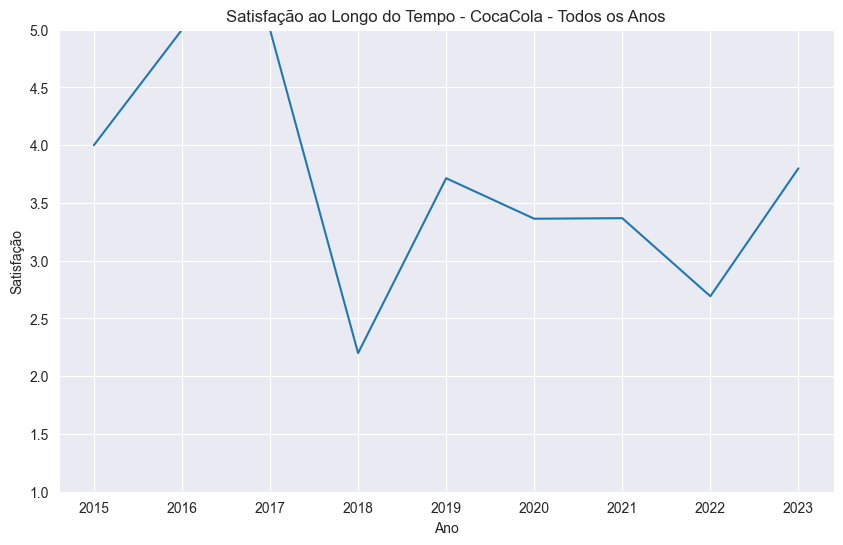

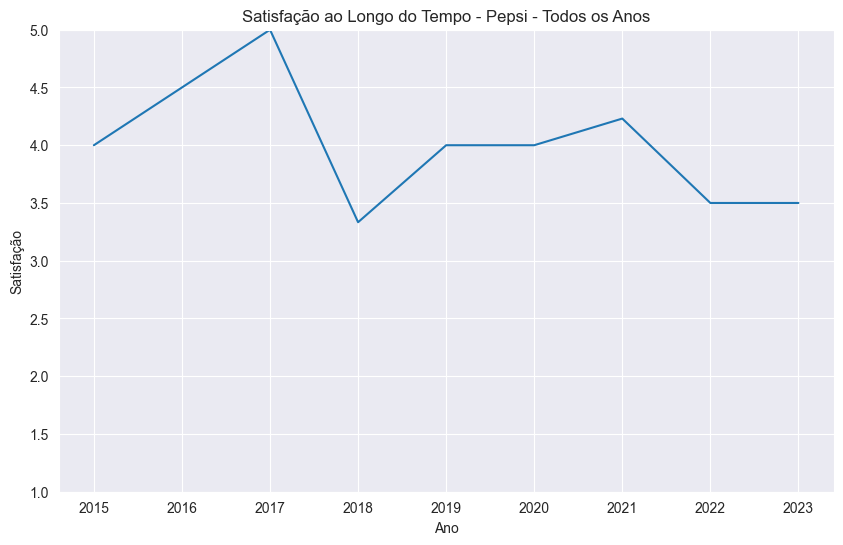

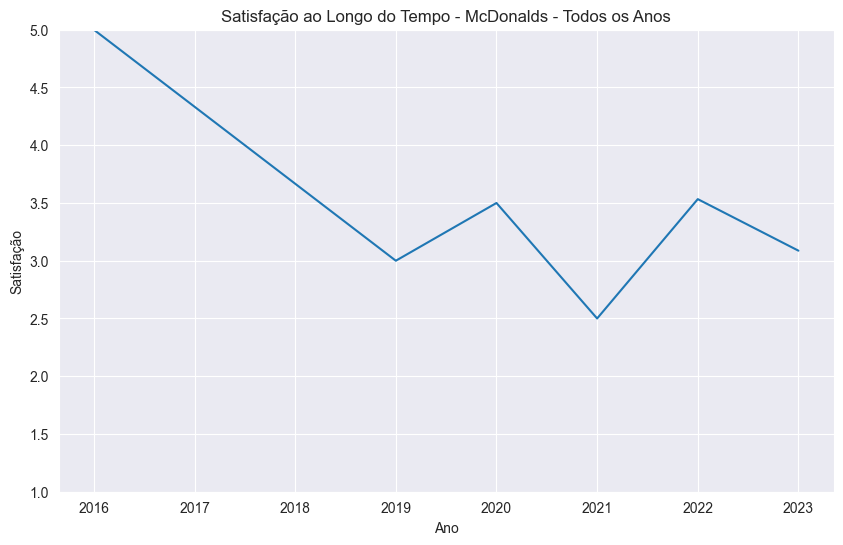

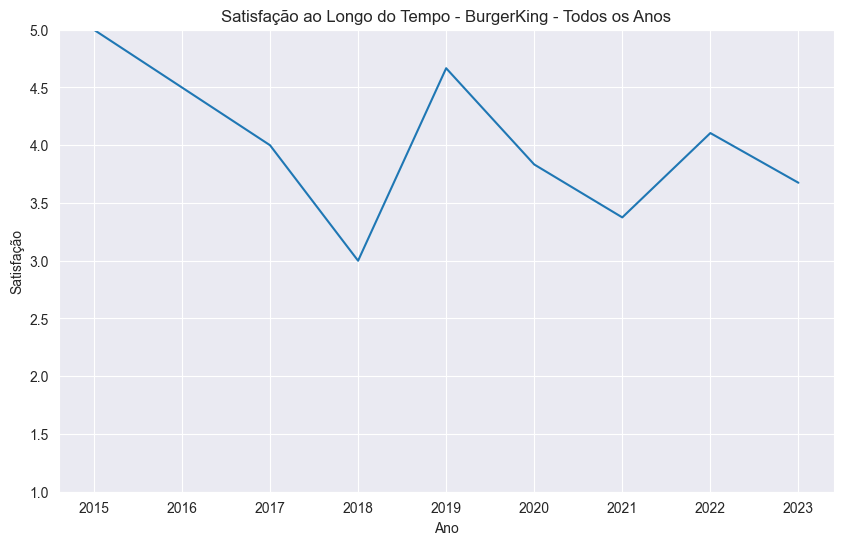

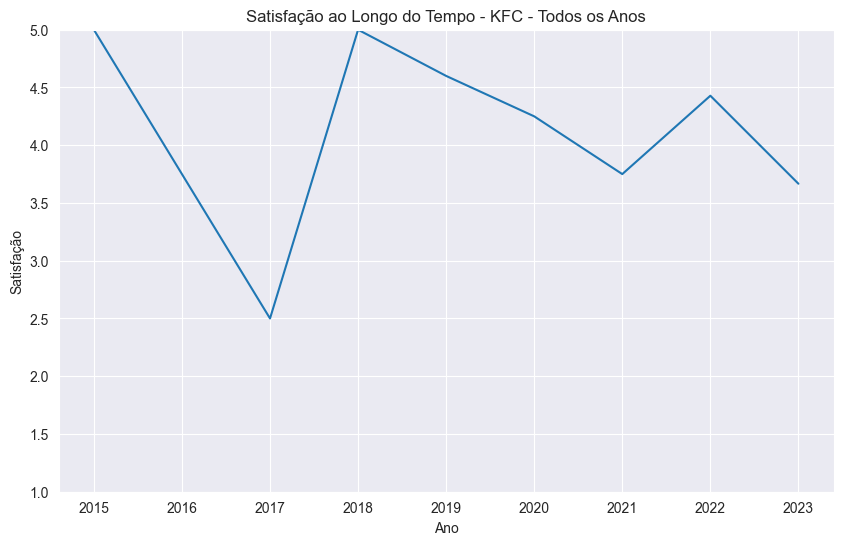

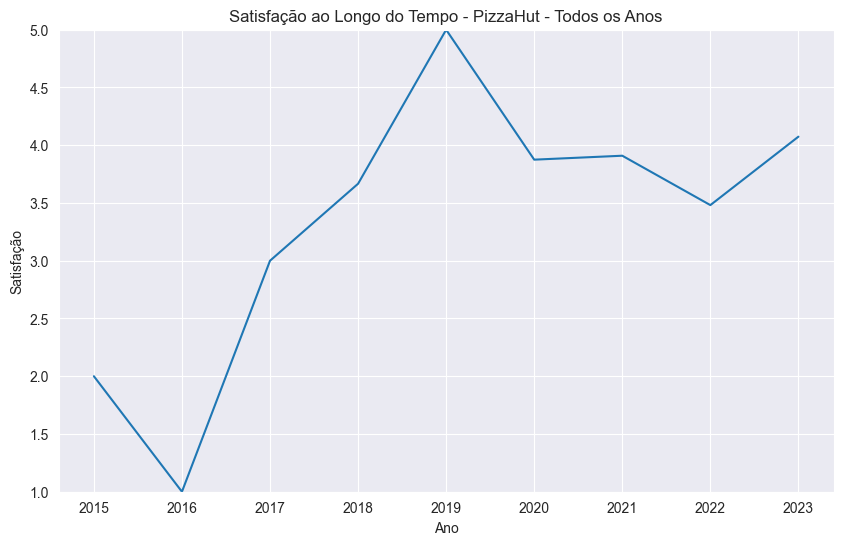

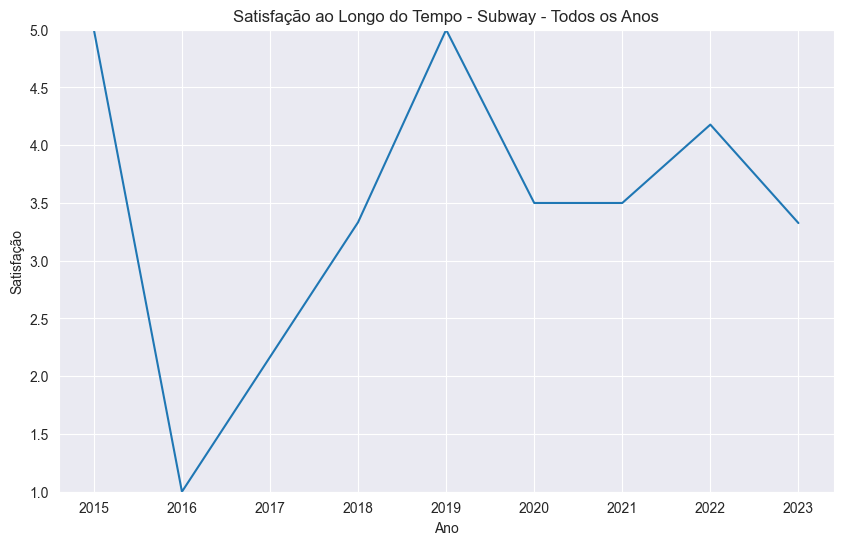

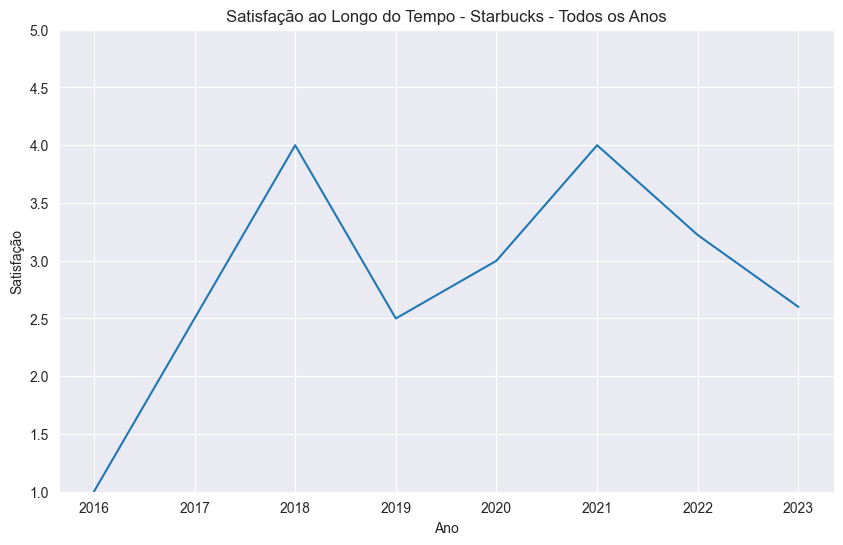

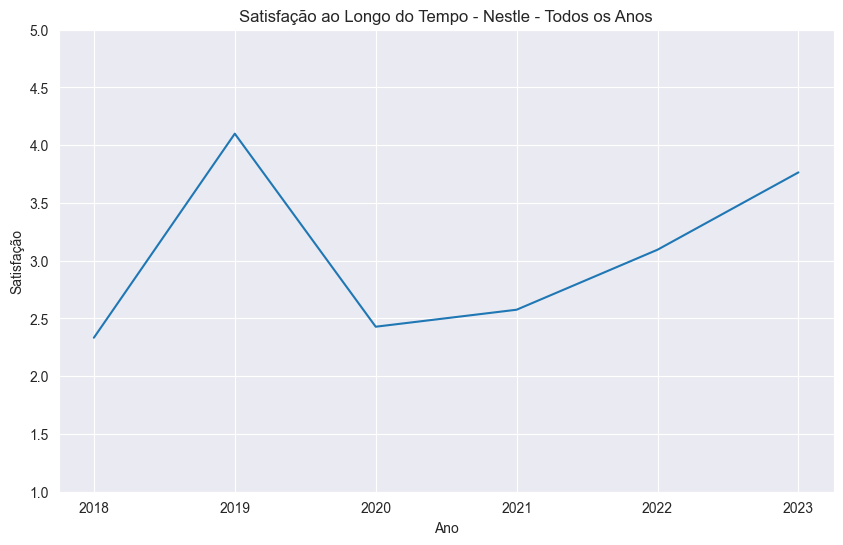

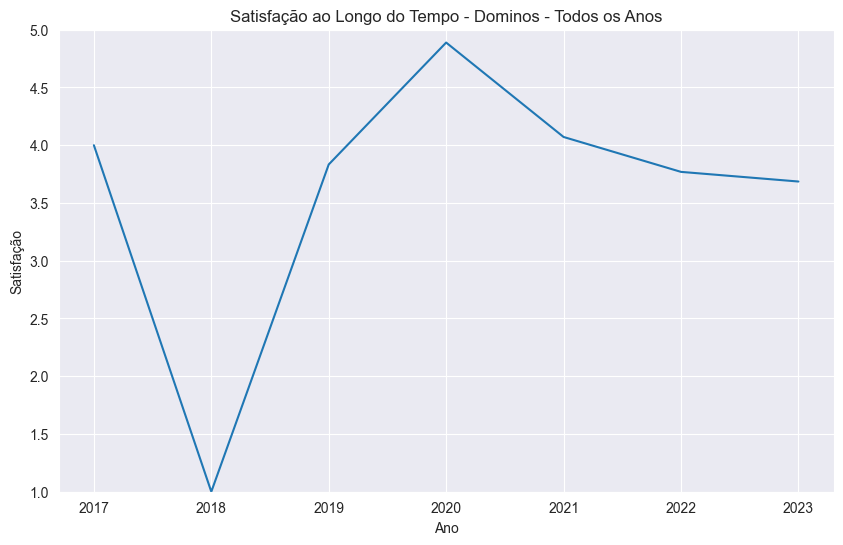

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('DadosColetados/dados_reddit2.csv')
df['date'] = pd.to_datetime(df['date'])

# Define os limites fixos do eixo y
y_limit = (1, 5)

# Cria um gráfico para cada empresa
for empresa in df['company'].unique():
    # Filtra o DataFrame para a empresa específica
    df_empresa = df[df['company'] == empresa]

    # Agrupa os dados por ano, calculando a média da satisfação
    df_agrupado = df_empresa.groupby(df_empresa['date'].dt.year)['sentiment'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='sentiment', data=df_agrupado)
    plt.ylim(y_limit)
    plt.title(f'Satisfação ao Longo do Tempo - {empresa} - Todos os Anos')
    plt.xlabel('Ano')
    plt.ylabel('Satisfação')
    plt.show()


# Satisfação media geral com as empresas

### Satisfação Geral com Empresas:
###### No trecho de código abaixo, realizamos o cálculo da média de satisfação para cada empresa com base nos dados. Em seguida, utilizamos a biblioteca Seaborn para criar um gráfico de barras que visualiza a satisfação média associada a cada empresa.
### Pré-processamento de Dados:
###### Carregamos os dados a partir de um arquivo CSV e convertemos a coluna de data para o formato adequado.
### Cálculo da Satisfação Média:
###### Utilizamos a função groupby do pandas para agrupar os dados por empresa e calcular a média da satisfação para cada uma.
### Geração do Gráfico de Barras:
###### Criamos um gráfico de barras utilizando a biblioteca Seaborn, representando a satisfação média para cada empresa. A paleta de cores 'viridis' é escolhida para fornecer uma representação visual clara.
### Exibição do Gráfico:
###### O gráfico é exibido, permitindo a fácil comparação da satisfação média entre as diferentes empresas. Essa visualização é útil para identificar quais empresas têm, em média, uma satisfação mais alta ou mais baixa.

C:\Users\Joaov\AppData\Local\Temp\ipykernel_12112\38478371.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company', y='sentiment', data=df_avg, palette='viridis')


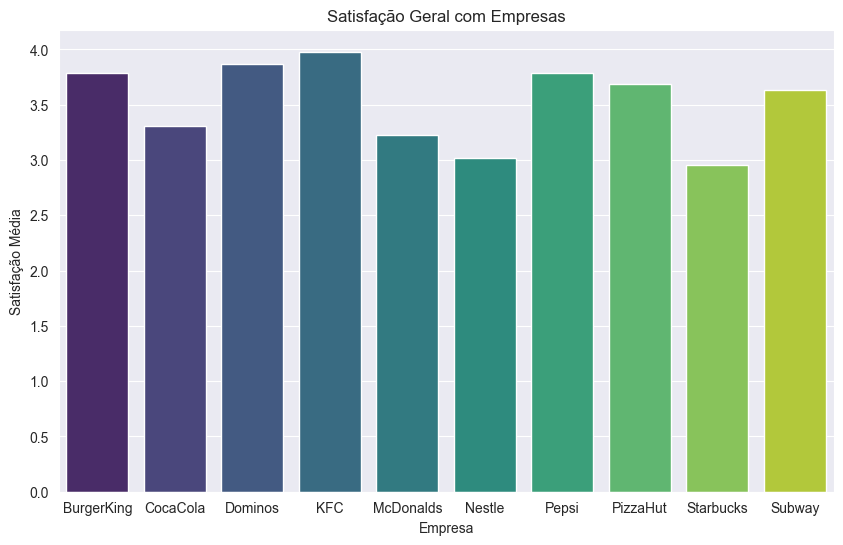

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('DadosColetados/dados_reddit2.csv')
df['date'] = pd.to_datetime(df['date'])

# Calcula a média de satisfação para cada empresa
df_avg = df.groupby('company')['sentiment'].mean().reset_index()

# Cria um gráfico de barras com Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='company', y='sentiment', data=df_avg, palette='viridis')


plt.title('Satisfação Geral com Empresas')
plt.xlabel('Empresa')
plt.ylabel('Satisfação Média')
plt.show()


# Satisfação media por ano

### Satisfação Média por Ano:
###### O código abaixo realiza a extração do ano da coluna de datas e, em seguida, calcula a média de satisfação para cada empresa ao longo dos anos. Utilizamos a biblioteca Seaborn para criar um gráfico de barras agrupado por ano e empresa, proporcionando uma visualização clara da satisfação média em diferentes períodos.
### Pré-processamento de Dados:
###### Carregamos os dados do arquivo CSV e convertemos a coluna de datas para o formato apropriado. Além disso, extraímos o ano da data para análises temporais.
### Cálculo da Satisfação Média por Ano e Empresa:
###### Utilizamos a função groupby para agrupar os dados por empresa e ano, calculando a média da satisfação para cada combinação.
### Geração do Gráfico de Barras Agrupado:
###### Criamos um gráfico de barras agrupado por ano e empresa usando a biblioteca Seaborn. Cada barra é dividida por empresa e colorida de acordo com uma paleta de cores (no caso, "husl").
### Exibição do Gráfico:
###### O gráfico final é exibido, proporcionando uma visualização eficaz da satisfação média para cada empresa ao longo dos anos. A legenda destaca a correspondência entre as cores e as empresas, facilitando a interpretação dos resultados.

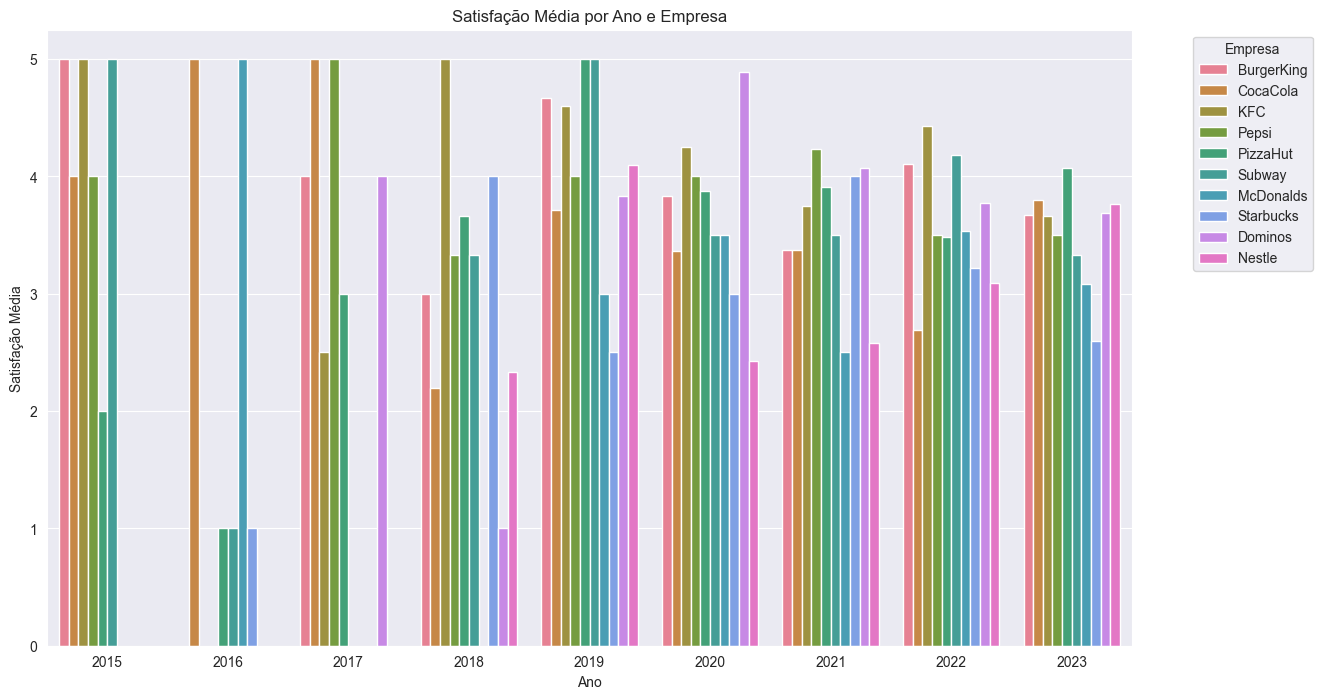

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('DadosColetados/dados_reddit2.csv')
df['date'] = pd.to_datetime(df['date'])

# Extrai o ano da coluna 'date'
df['year'] = df['date'].dt.year

# Calcula a média de satisfação para cada empresa e ano
df_avg = df.groupby(['company', 'year'])['sentiment'].mean().reset_index()
palette = sns.color_palette("husl", n_colors=len(df['company'].unique()))

plt.figure(figsize=(14, 8))
sns.barplot(x='year', y='sentiment', hue='company', data=df_avg, palette=palette)

plt.title('Satisfação Média por Ano e Empresa')
plt.xlabel('Ano')
plt.ylabel('Satisfação Média')
plt.legend(title='Empresa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Eventos importantes:

Coca-Cola: 
Em 2015, a empresa lançou uma campanha publicitária global chamada "Taste the Feeling" ¹. 
Em 2016, a Coca-Cola anunciou que estava mudando sua estratégia de marketing para se concentrar em produtos com menos açúcar e calorias ².
Em 2020, a empresa anunciou que estava descontinuando algumas de suas marcas menos populares, incluindo Tab e Odwalla ³. 
Em: 2020: Impacto da pandemia na indústria de bebidas.




Pepsi: 
Em 2015, a Pepsi lançou uma nova campanha publicitária global chamada "Live for Now" ⁴. 
Em 2016: Anúncio do retorno da bebida Crystal Pepsi.
Em 2016, a empresa anunciou que estava reformulando sua bebida Diet Pepsi para remover o aspartame . 
Em 2017: Comercial polêmico com Kendall Jenner.
Em 2019: Lançamento de campanhas como "Pepsi Generations".
Em 2020, a PepsiCo anunciou que estava mudando o nome e a embalagem de sua marca de tia Jemima para Pearl Milling Company .


McDonald's:
Em 2015: Lançamento do programa "All Day Breakfast". 
Em 2015, a McDonald's anunciou que estava mudando para ovos de galinhas criadas sem gaiolas em seus restaurantes dos EUA e Canadá . 
Em 2016, a empresa lançou seu programa "All Day Breakfast" nos EUA .
Em 2018: Compromisso com embalagens sustentáveis. 
Em 2020, a McDonald's anunciou que estava fechando temporariamente seus restaurantes em todo o mundo devido à pandemia COVID-19 .



Burger King: 
Em 2015, o Burger King lançou um novo hambúrguer vegetariano chamado "Whopper Vegetariano" no Reino Unido . 
Em 2016, a empresa anunciou que estava comprando a cadeia canadense de café Tim Hortons por US $ 11 bilhões . 
Em 2017: Lançamento da campanha "Google Home of the Whopper".
Em 2019: Introdução do hambúrguer à base de plantas "Impossible Whopper".
Em 2020, o Burger King anunciou que estava testando um hambúrguer vegetariano à base de plantas em alguns mercados dos EUA .
Em 2020: Estratégias de marketing durante a pandemia



KFC: 
Em 2015: Retorno do Coronel Sanders como mascote.
Em 2015, o KFC lançou um novo sanduíche de frango frito chamado "Double Down Dog" nas Filipinas . 
Em 2016, a empresa anunciou que estava mudando sua receita de frango para remover antibióticos importantes para humanos até o final de 2018 . 
Em 2017: Problemas de fornecimento de frango no Reino Unido.
Em 2020, o KFC suspendeu temporariamente seu slogan "Finger Lickin 'Good" devido à pandemia COVID-19 .
Em 2021: Introdução do frango frito à base de plantas.


Pizza Hut: 
Em 2015, a Pizza Hut lançou uma nova campanha publicitária global chamada "Flavor of Now" . 
Em 2016, a empresa anunciou que estava removendo conservantes artificiais e sabores artificiais de seus ingredientes até o final de julho daquele ano .
Em 2018: Foco em tecnologia, incluindo pedidos online.
Em 2020, a Pizza Hut anunciou que estava fechando permanentemente cerca de 300 restaurantes nos EUA .
Em 2020: Resposta à pandemia, com ênfase nas opções de entrega.


Subway: 
Em 2015, o Subway removeu um ingrediente químico controverso chamado azodicarbonamida de seu pão após uma petição online pedindo sua remoção . 
Em 2016, a empresa anunciou que estava mudando para carne sem antibióticos em seus restaurantes dos EUA até o final daquele ano . 
Em 2016: Mudança para ingredientes naturais e orgânicos.
Em 2019: Encerramento de lojas nos EUA, ajustando estratégias
Em 2020, o Subway foi processado por um grupo de clientes que afirmaram que os sanduíches da cadeia continham menos atum do que o anunciado .
Em 2021: Introdução de alternativas de carne à base de plantas.


Starbucks: 
Em 2015, a Starbucks lançou uma nova bebida sazonal chamada "Chestnut Praline Latte" nos EUA e no Canadá . 
Em 2016, a empresa anunciou que estava expandindo seu programa "FoodShare" para doar alimentos não vendidos para bancos de alimentos locais nos EUA e no Canadá . 
Em 2017: Fechamento de lojas para treinamento antirracial.
Em 2019: Foco em sustentabilidade, eliminando canudos de plástico.
Em 2020, a Starbucks anunciou que estava fechando temporariamente cerca de metade de seus cafés nos EUA e no Canadá devido à pandemia COVID-19 .
Em 2020: Resposta à pandemia, com foco em pedidos móveis e drive-thru.


Nestlé:
Em 2016, a Nestlé anunciou que estava comprometida em usar apenas ovos de galinhas criadas sem gaiolas em seus produtos em todo o mundo até 2025 ². 
Em 2017, a empresa adquiriu a Blue Bottle Coffee, uma empresa de café artesanal com sede em Oakland, Califórnia ³. 
Em 2018, a Nestlé adquiriu a empresa de vitaminas e suplementos alimentares Atrium Innovations por US  2,3 bilhões ⁴. 
Em 2018: Venda do negócio de confeitos nos EUA para a Ferrero.
Em 2019, a Nestlé anunciou que estava lançando um programa de reciclagem de plásticos de US 2 bilhões para reduzir o desperdício de plástico e aumentar o uso de materiais reciclados em suas embalagens 
Em 2020, a Nestlé anunciou que estava vendendo sua unidade de água engarrafada nos EUA para a One Rock Capital Partners por US $ 4,3 bilhões ⁶.
Em 2020: Resposta à pandemia, destacando produtos essenciais.

Domino's:

2015: Lançamento da campanha "Emoji Ordering".
2018: Expansão global e inovações tecnológicas.
2020: Ênfase em entrega sem contato durante a pandemia.

Origem:
(1) The timeline of Nestlé’s company history - Nestlé Global. https://www.nestle.com/about/history/nestle-company-history.
(2) Nestlé Brasil: Seja bem-vindo! | Nestlé. https://www.nestle.com.br/.
(3) Our latest news | Nestlé Global. https://www.nestle.com/media/news.
(4) Our latest news | Nestlé Global. https://bing.com/search?q=Nestl%c3%a9+events+recent.
(5) Nestlé press releases| Nestlé Global. https://www.nestle.com/media/pressreleases.
(6) Publication of 2015 Annual Report | Nestlé Global. https://www.nestle.com/media/mediaeventscalendar/allevents/2015-annual-report.
(7) Nestlé Investors | Nestlé Global. https://www.nestle.com/investors.
(8) McDonald's Versus Burger King Versus Starbucks Versus Subway | Time. https://time.com/3847781/fast-food/.
(9) Yum! Brands - Wikipedia. https://en.wikipedia.org/wiki/Yum!_Brands.
(10) QSR brand value: Marketing mix dimensions among McDonald’s, KFC, Burger .... https://www.emerald.com/insight/content/doi/10.1108/IJCHM-06-2015-0300/full/html.
(11) https://en.wikipedia.org/wiki/Yum.

(12)  https://bing.com/search?q=Coca-Cola+events+from+2015+to+present [Accessed 7 Oct. 2023].
(13)  https://bing.com/search?q=Pepsi+events+from+2015+to+present [Accessed 7 Oct. 2023].
(14)  https://bing.com/search?q=Nestl%C3%A9+events+from+2015+to+present [Accessed 7 Oct. 2023].
(15)  https://bing.com/search?q=Domino%27s+Pizza+events+from+2015+to+present [Accessed 7 Oct. 2023].
(16)  https://www.reddit.com/r/ChatGPT/comments/1116sf5/how_does_microsoft_show_references_in_the_new/.
(17)  James Cook University. https://libanswers.jcu.edu.au/faq/273413.
(18)  https://www.microsoft.com/en-us/edge/features/bing-chat.

# Visao Geral do dataframe

In [524]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('DadosColetados/dados_reddit2.csv')
df['date'] = pd.to_datetime(df['date'])

In [5]:
df

,date,company,sentiment
0,2023-08-26 13:15:45,CocaCola,5
1,2023-05-26 11:14:32,CocaCola,5
2,2016-11-26 16:17:24,CocaCola,5
3,2022-03-08 01:50:44,CocaCola,1
4,2023-07-14 04:03:32,CocaCola,1
...,...,...,...
956,2020-04-01 10:31:03,Dominos,5
957,2023-04-17 16:00:43,Dominos,5
958,2021-10-19 12:10:38,Dominos,1
959,2017-08-06 16:10:15,Dominos,5


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       961 non-null    datetime64[ns]
 1   company    961 non-null    object        
 2   sentiment  961 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.6+ KB
None


In [7]:
print(df.describe())


                                date   sentiment
count                            961  961.000000
mean   2022-01-06 21:37:48.188345600    3.523413
min              2015-01-18 20:49:10    1.000000
25%              2021-04-04 12:00:05    1.000000
50%              2022-07-06 15:27:21    5.000000
75%              2023-03-30 22:24:04    5.000000
max              2023-09-30 20:58:17    5.000000
std                              NaN    1.792846


# Total comparativo de postagens analisadas independendo do ano

C:\Users\Joaov\AppData\Local\Temp\ipykernel_12112\3057513158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='company', data=df, palette='viridis')


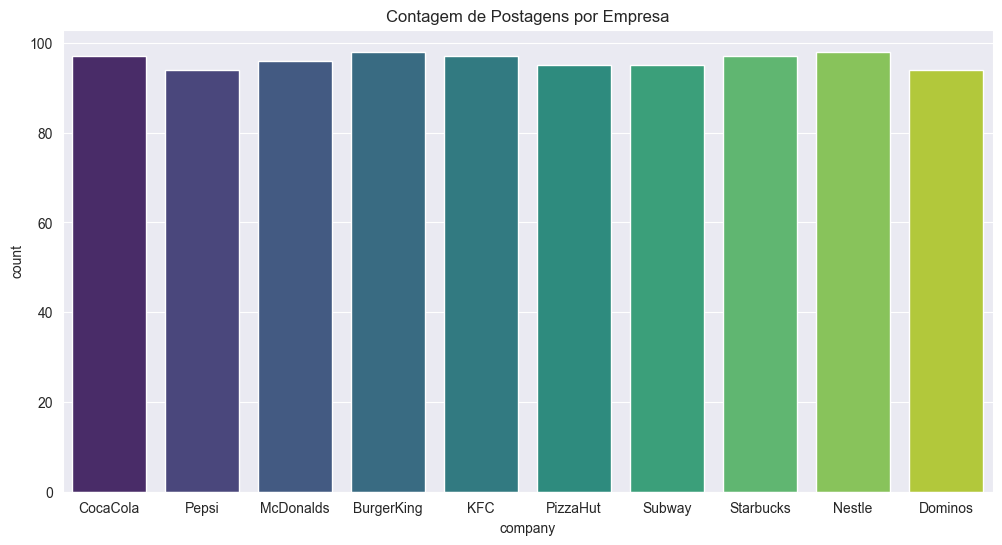

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='company', data=df, palette='viridis')
plt.title('Contagem de Postagens por Empresa')
plt.show()


# Distribuição da satisfação

### Distribuição da Satisfação por Empresa:
###### O trecho de código abaixo cria um histograma que visualiza a distribuição da satisfação para cada empresa. Utilizando a biblioteca Seaborn, o gráfico empilha as distribuições de satisfação para diferentes empresas, permitindo a comparação das frequências em cada nível de satisfação.
### Observações sobre a Distribuição:
###### O gráfico revela que a maioria das avaliações de satisfação está concentrada nos extremos, ou seja, em níveis muito altos (próximos a 5) ou muito baixos (próximos a 1). As classificações intermédias (2, 3 e 4) são significativamente menos frequentes em comparação. Essa observação sugere que as opiniões dos usuários tendem a polarizar-se para extremos, indicando uma propensão a avaliações mais emocionais ou distintas para as empresas em questão. A paleta de cores "viridis" foi escolhida para destacar visualmente essas distribuições.

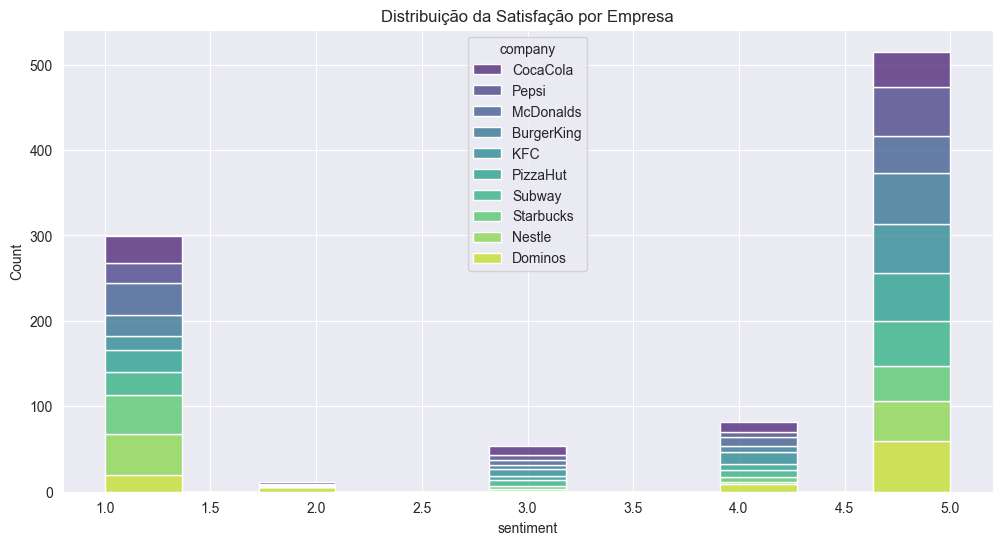

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(x='sentiment', data=df, hue='company', multiple='stack', palette='viridis')
plt.title('Distribuição da Satisfação por Empresa')
plt.show()


In [80]:
df['date'] = pd.to_datetime(df['date'])

# Criar coluna 'ano' apenas com o ano
df['ano'] = df['date'].dt.year

# Criar coluna 'day_of_week'
df['dia_da_semana'] = df['date'].dt.day_name()

# Criar coluna 'mes'
df['mes'] = df['date'].dt.month_name()
df = df.drop('date', axis=1)

df

,company,sentiment,ano,dia_da_semana,mes
0,CocaCola,5,2023,Saturday,August
1,CocaCola,5,2023,Friday,May
2,CocaCola,5,2016,Saturday,November
3,CocaCola,1,2022,Tuesday,March
4,CocaCola,1,2023,Friday,July
...,...,...,...,...,...
956,Dominos,5,2020,Wednesday,April
957,Dominos,5,2023,Monday,April
958,Dominos,1,2021,Tuesday,October
959,Dominos,5,2017,Sunday,August


### Adição de Eventos Relevantes:
###### Neste trecho de código, uma função chamada adicionar_eventos é definida para atribuir eventos significativos com base no ano e na empresa. Essa função é posteriormente aplicada ao DataFrame para criar uma nova coluna chamada 'eventos', que registra eventos específicos relacionados a cada empresa em um determinado ano.

In [81]:
def adicionar_eventos(row):
    if row['company'] == 'CocaCola':
        if row['ano'] == 2015:
            return "Lançamento da campanha 'Taste the Feeling'"
        elif row['ano'] == 2016:
            return "Mudança na estratégia de marketing para produtos com menos açúcar e calorias"
        elif row['ano'] == 2020:
            return "Descontinuação de marcas menos populares; Impacto da pandemia na indústria de bebidas"

    elif row['company'] == 'Pepsi':
        if row['ano'] == 2015:
            return "Lançamento da campanha 'Live for Now'"
        elif row['ano'] == 2016:
            return "Anúncio do retorno da bebida Crystal Pepsi; Reformulação da Diet Pepsi"
        elif row['ano'] == 2017:
            return "Comercial polêmico com Kendall Jenner"
        elif row['ano'] == 2019:
            return "Lançamento de campanhas como 'Pepsi Generations'"
        elif row['ano'] == 2020:
            return "Mudança de nome e embalagem de Tia Jemima para Pearl Milling Company"

    elif row['company'] == 'McDonalds':
        if row['ano'] == 2015:
            return "Lançamento do programa 'All Day Breakfast'"
        elif row['ano'] == 2015:
            return "Mudança para ovos de galinhas criadas sem gaiolas nos restaurantes dos EUA e Canadá"
        elif row['ano'] == 2016:
            return "Lançamento do programa 'All Day Breakfast' nos EUA"
        elif row['ano'] == 2018:
            return "Compromisso com embalagens sustentáveis"
        elif row['ano'] == 2020:
            return "Fechamento temporário de restaurantes em todo o mundo devido à pandemia COVID-19"

    elif row['company'] == 'BurgerKing':
        if row['ano'] == 2015:
            return "Lançamento do novo hambúrguer vegetariano 'Whopper Vegetariano' no Reino Unido"
        elif row['ano'] == 2016:
            return "Aquisição da cadeia canadense de café Tim Hortons por US $ 11 bilhões"
        elif row['ano'] == 2017:
            return "Lançamento da campanha 'Google Home of the Whopper'"
        elif row['ano'] == 2019:
            return "Introdução do hambúrguer à base de plantas 'Impossible Whopper'"
        elif row['ano'] == 2020:
            return "Teste de um hambúrguer vegetariano à base de plantas em alguns mercados dos EUA; Estratégias de marketing durante a pandemia"

    elif row['company'] == 'KFC':
        if row['ano'] == 2015:
            return "Retorno do Coronel Sanders como mascote"
        elif row['ano'] == 2015:
            return "Lançamento do novo sanduíche de frango frito 'Double Down Dog' nas Filipinas"
        elif row['ano'] == 2016:
            return "Mudança na receita de frango para remover antibióticos importantes para humanos até o final de 2018"
        elif row['ano'] == 2017:
            return "Problemas de fornecimento de frango no Reino Unido"
        elif row['ano'] == 2020:
            return "Suspensão temporária do slogan 'Finger Lickin' Good' devido à pandemia COVID-19"
        elif row['ano'] == 2021:
            return "Introdução do frango frito à base de plantas"

    elif row['company'] == 'PizzaHut':
        if row['ano'] == 2015:
            return "Lançamento da campanha 'Flavor of Now'"
        elif row['ano'] == 2016:
            return "Remoção de conservantes artificiais e sabores artificiais dos ingredientes até o final de julho daquele ano"
        elif row['ano'] == 2018:
            return "Foco em tecnologia, incluindo pedidos online"
        elif row['ano'] == 2020:
            return "Fechamento permanente de cerca de 300 restaurantes nos EUA; Resposta à pandemia, com ênfase nas opções de entrega"

    elif row['company'] == 'Subway':
        if row['ano'] == 2015:
            return "Remoção do ingrediente químico controverso azodicarbonamida do pão após uma petição online"
        elif row['ano'] == 2016:
            return "Mudança para carne sem antibióticos nos restaurantes dos EUA até o final daquele ano; Mudança para ingredientes naturais e orgânicos"
        elif row['ano'] == 2019:
            return "Encerramento de lojas nos EUA, ajustando estratégias"
        elif row['ano'] == 2020:
            return "Processo por um grupo de clientes alegando que os sanduíches continham menos atum do que o anunciado"
        elif row['ano'] == 2021:
            return "Introdução de alternativas de carne à base de plantas"

    elif row['company'] == 'Starbucks':
        if row['ano'] == 2015:
            return "Lançamento da nova bebida sazonal 'Chestnut Praline Latte' nos EUA e no Canadá"
        elif row['ano'] == 2016:
            return "Expansão do programa 'FoodShare' para doar alimentos não vendidos para bancos de alimentos locais nos EUA e no Canadá"
        elif row['ano'] == 2017:
            return "Fechamento de lojas para treinamento antirracial"
        elif row['ano'] == 2019:
            return "Foco em sustentabilidade, eliminando canudos de plástico"
        elif row['ano'] == 2020:
            return "Fechamento temporário de cerca de metade de seus cafés nos EUA e no Canadá devido à pandemia COVID-19; Resposta à pandemia, com foco em pedidos móveis e drive-thru"

    elif row['company'] == 'Nestle':
        if row['ano'] == 2016:
            return "Compromisso em usar apenas ovos de galinhas criadas sem gaiolas em seus produtos em todo o mundo até 2025"
        elif row['ano'] == 2017:
            return "Aquisição da Blue Bottle Coffee, uma empresa de café artesanal com sede em Oakland, Califórnia"
        elif row['ano'] == 2018:
            return "Aquisição da empresa de vitaminas e suplementos alimentares Atrium Innovations por US 2,3 bilhões; Venda do negócio de confeitos nos EUA para a Ferrero"
        elif row['ano'] == 2019:
            return "Lançamento de um programa de reciclagem de plásticos de US 2 bilhões para reduzir o desperdício de plástico e aumentar o uso de materiais reciclados em suas embalagens"
        elif row['ano'] == 2020:
            return "Venda da unidade de água engarrafada nos EUA para a One Rock Capital Partners por US $ 4,3 bilhões; Resposta à pandemia, destacando produtos essenciais"

    elif row['company'] == 'Dominos':
        if row['ano'] == 2015:
            return "Lançamento da campanha 'Emoji Ordering'"
        elif row['ano'] == 2018:
            return "Expansão global e inovações tecnológicas"
        elif row['ano'] == 2020:
            return "Ênfase em entrega sem contato durante a pandemia"

    return ""

df['eventos'] = df.apply(adicionar_eventos, axis=1)


# Cruzamento de eventos importantes com satisfação do publico

###### Neste conjunto de gráficos, exploramos a média de satisfação ao longo dos anos para cada empresa. Cada gráfico representa uma empresa específica e exibe barras que indicam a média de satisfação em tons de cinza. Além disso, eventos marcantes associados a cada ano são destacados, proporcionando insights adicionais sobre possíveis correlações entre eventos específicos e a satisfação do cliente.

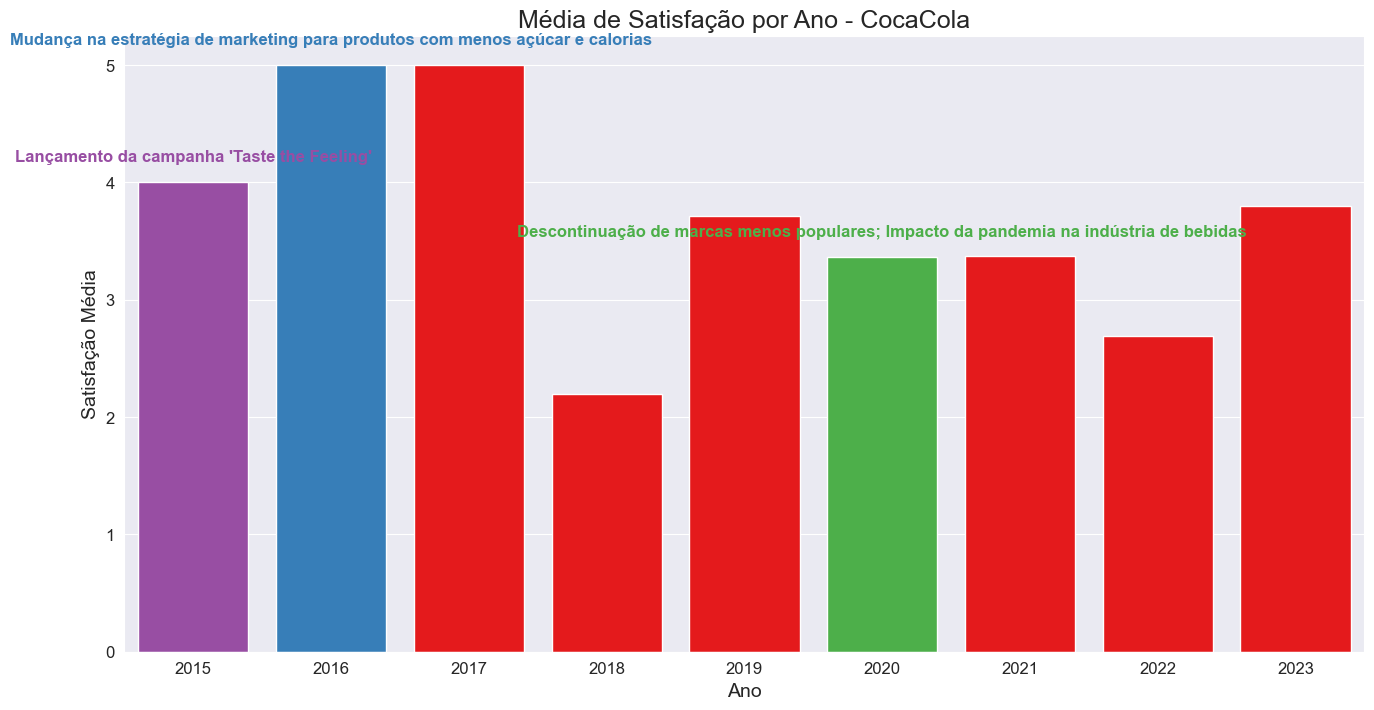

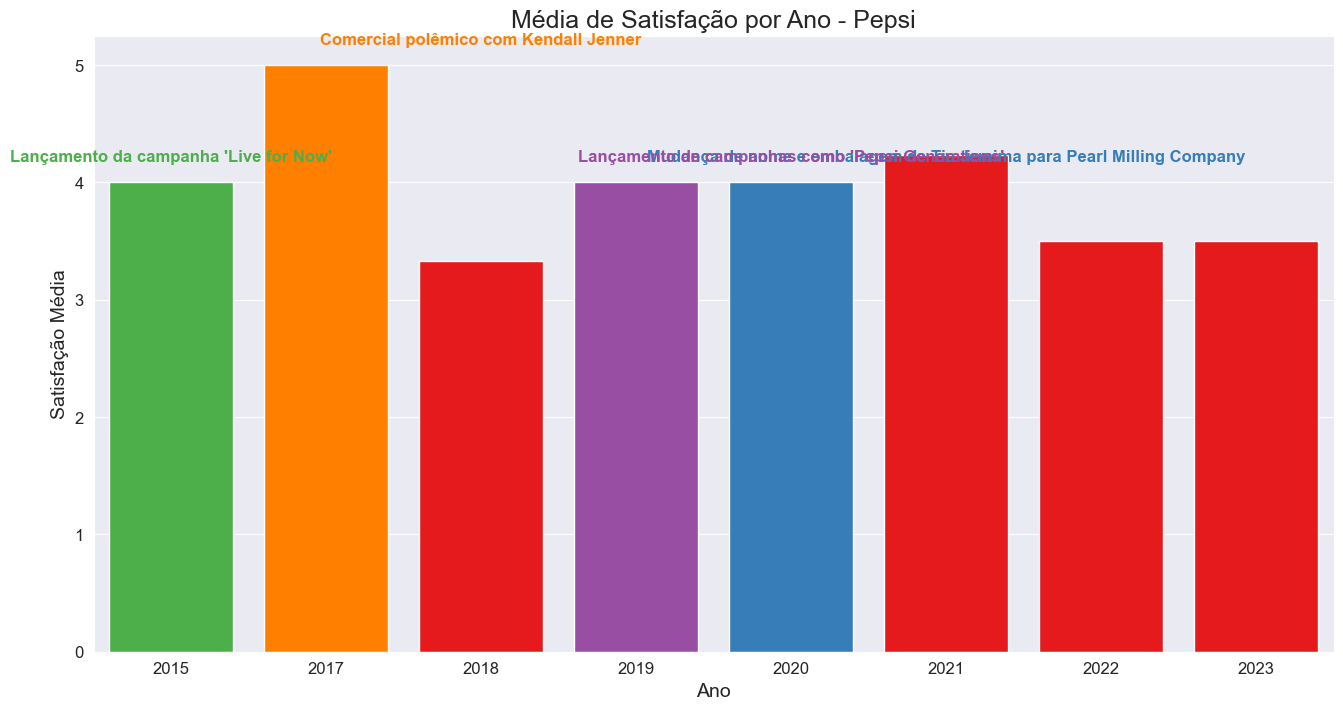

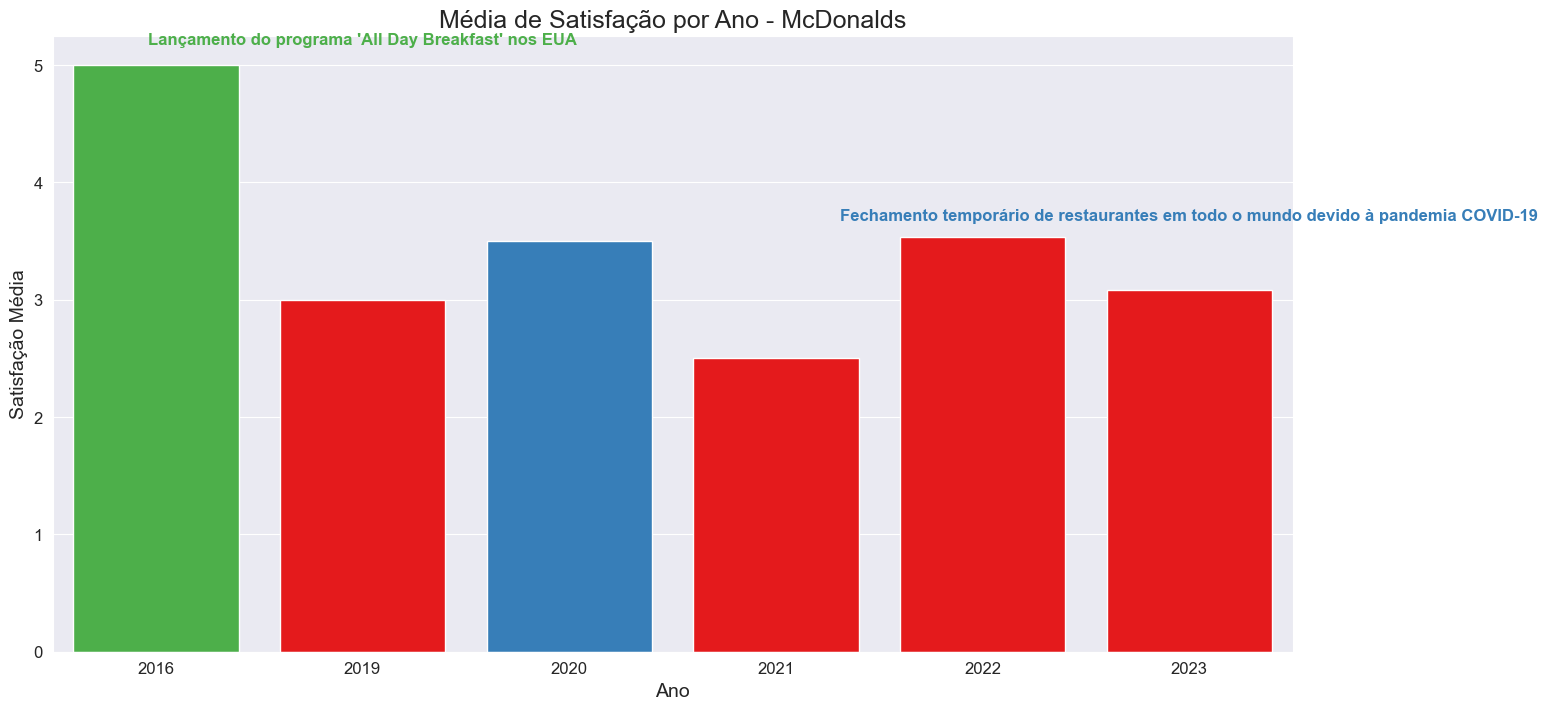

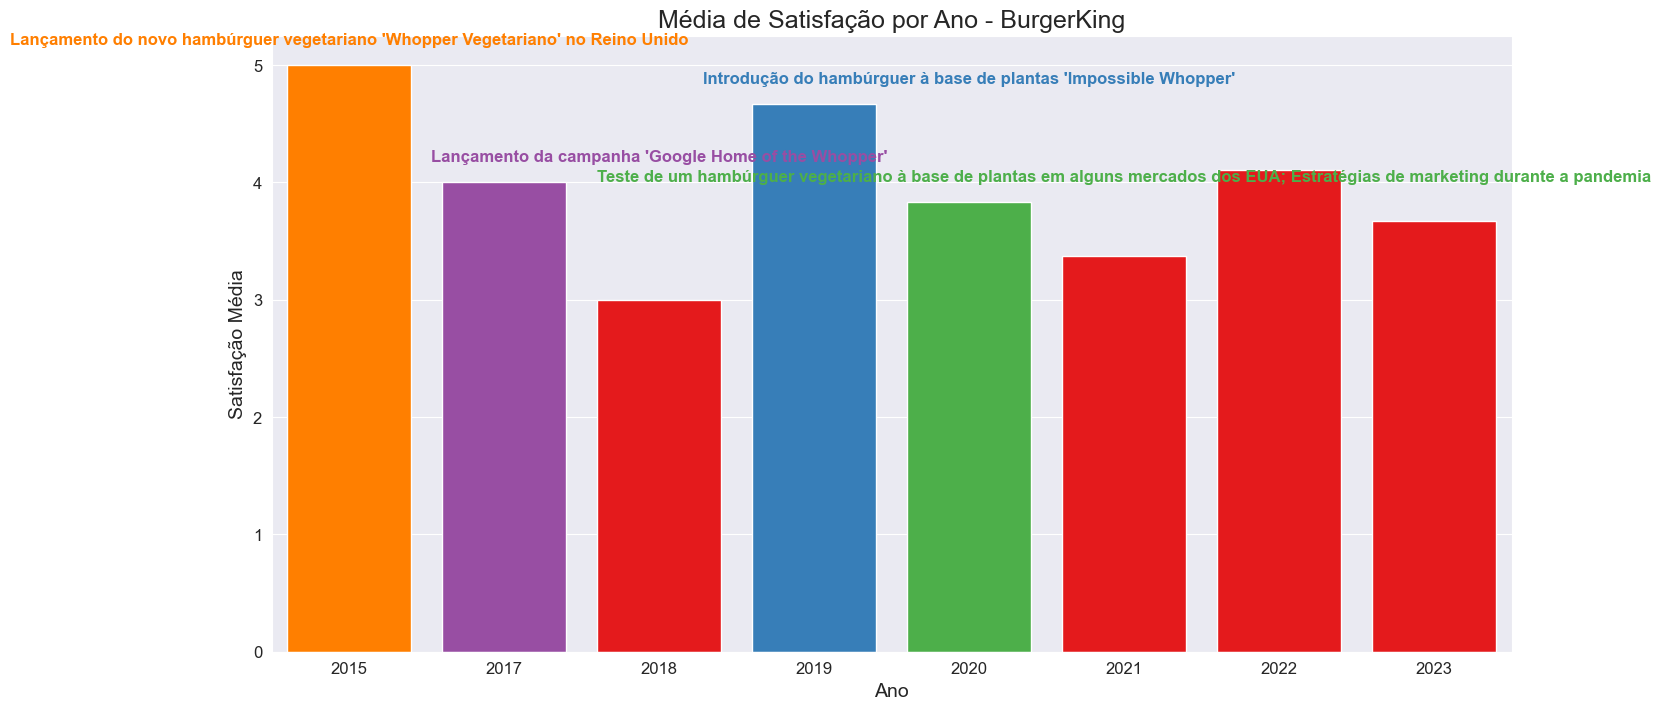

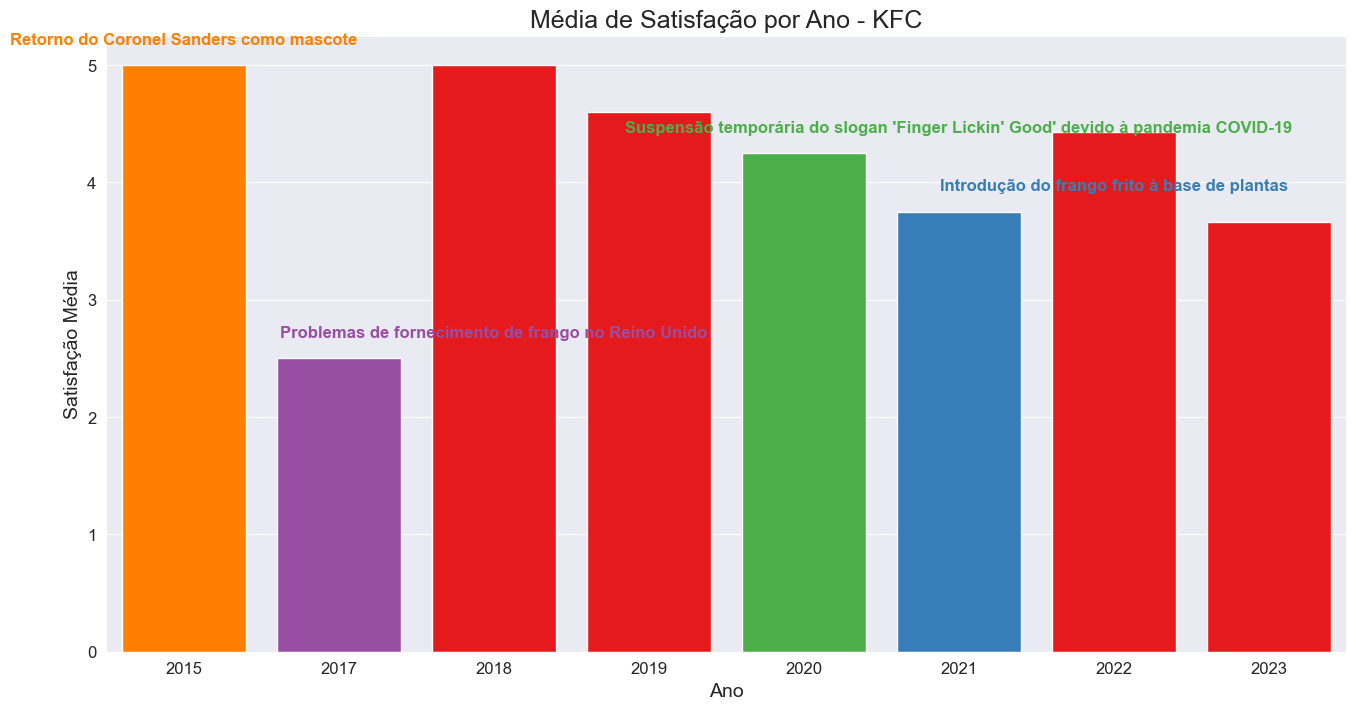

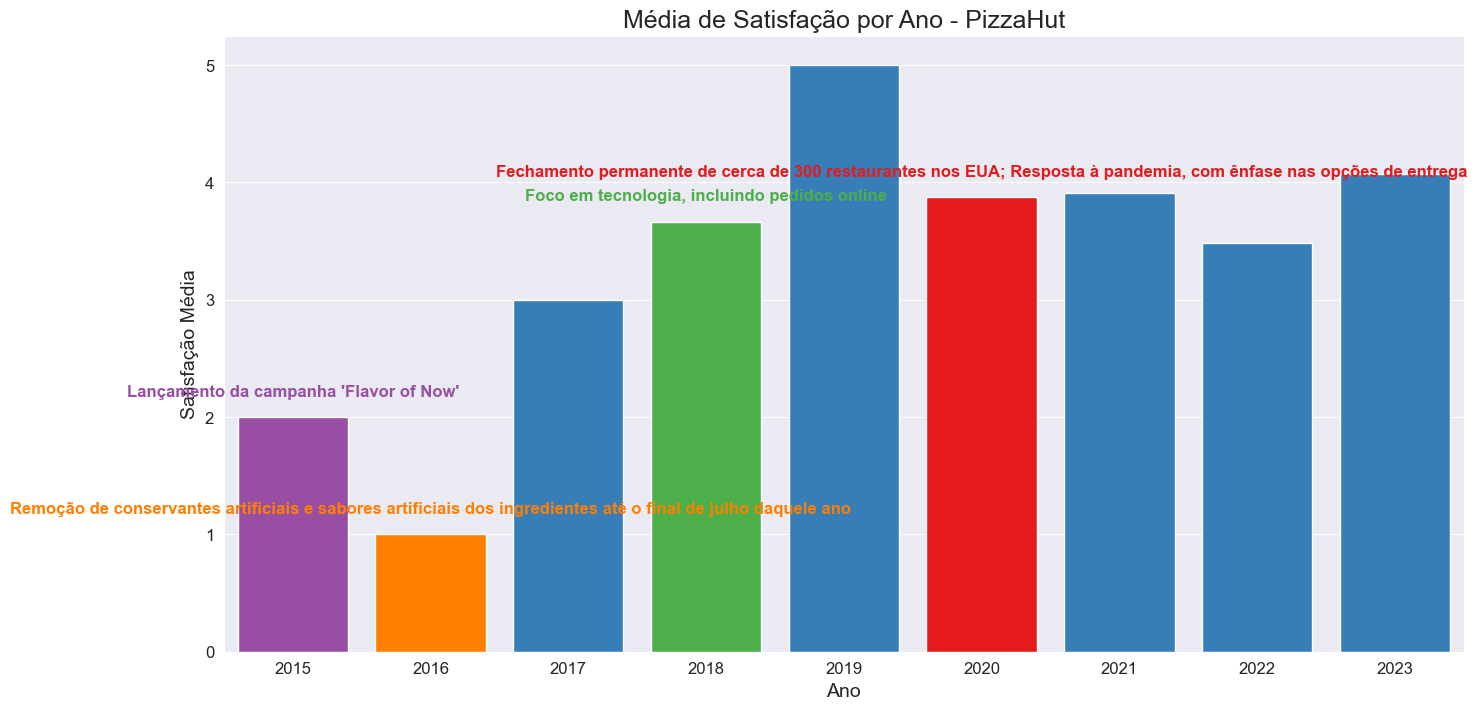

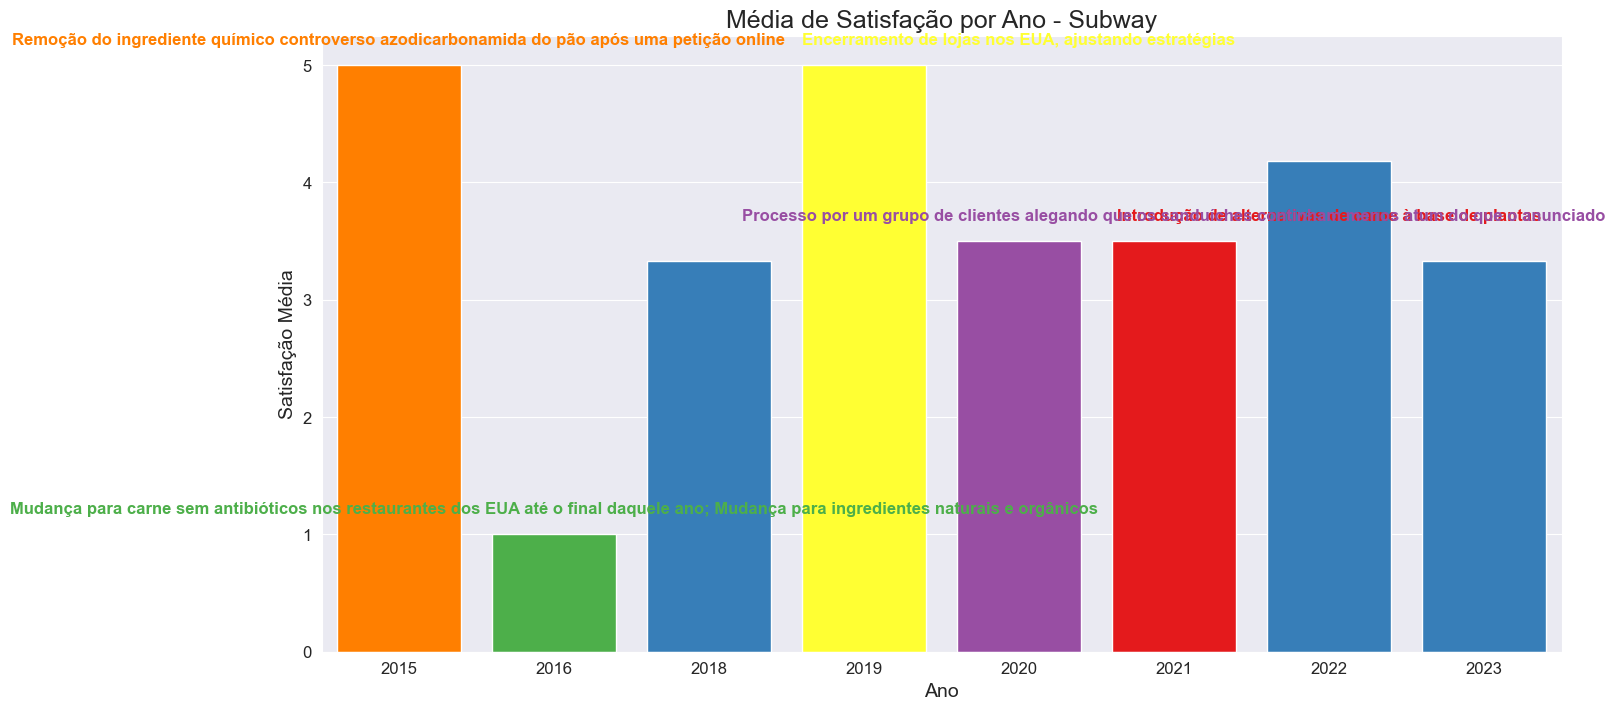

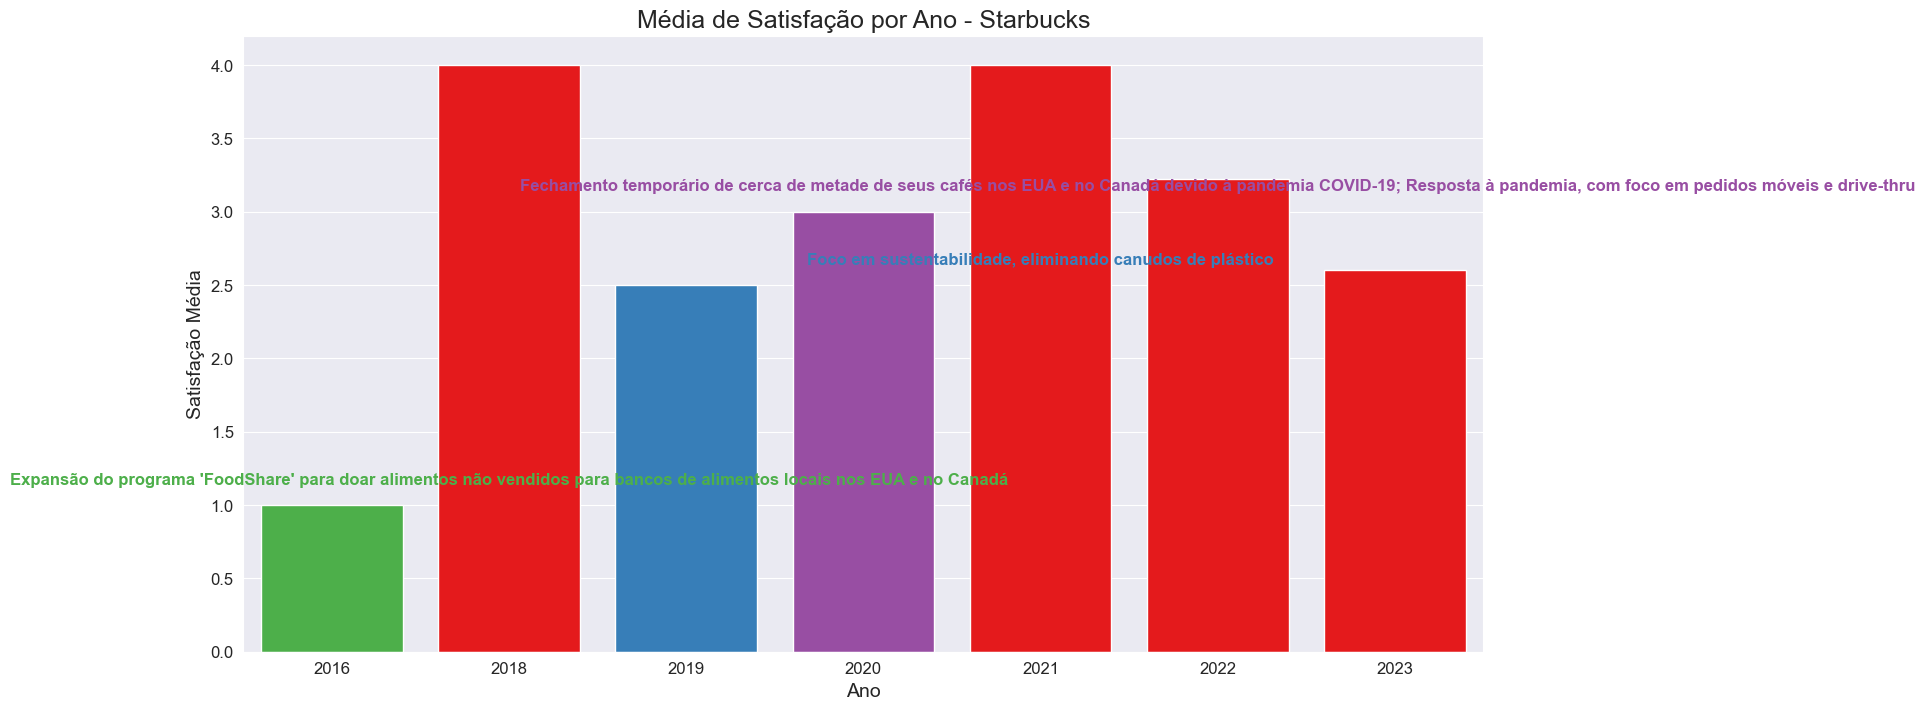

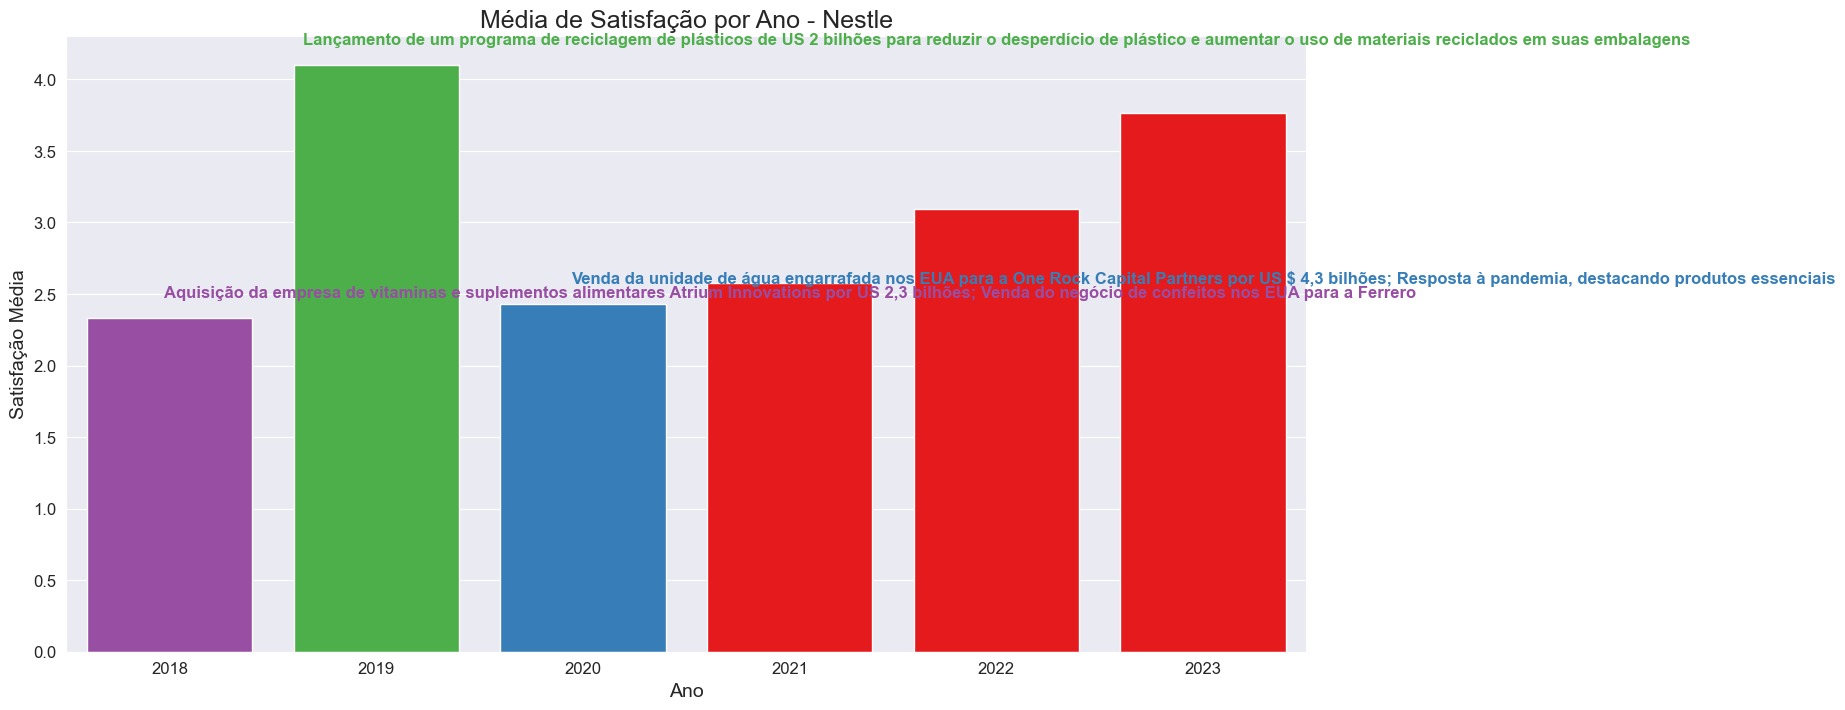

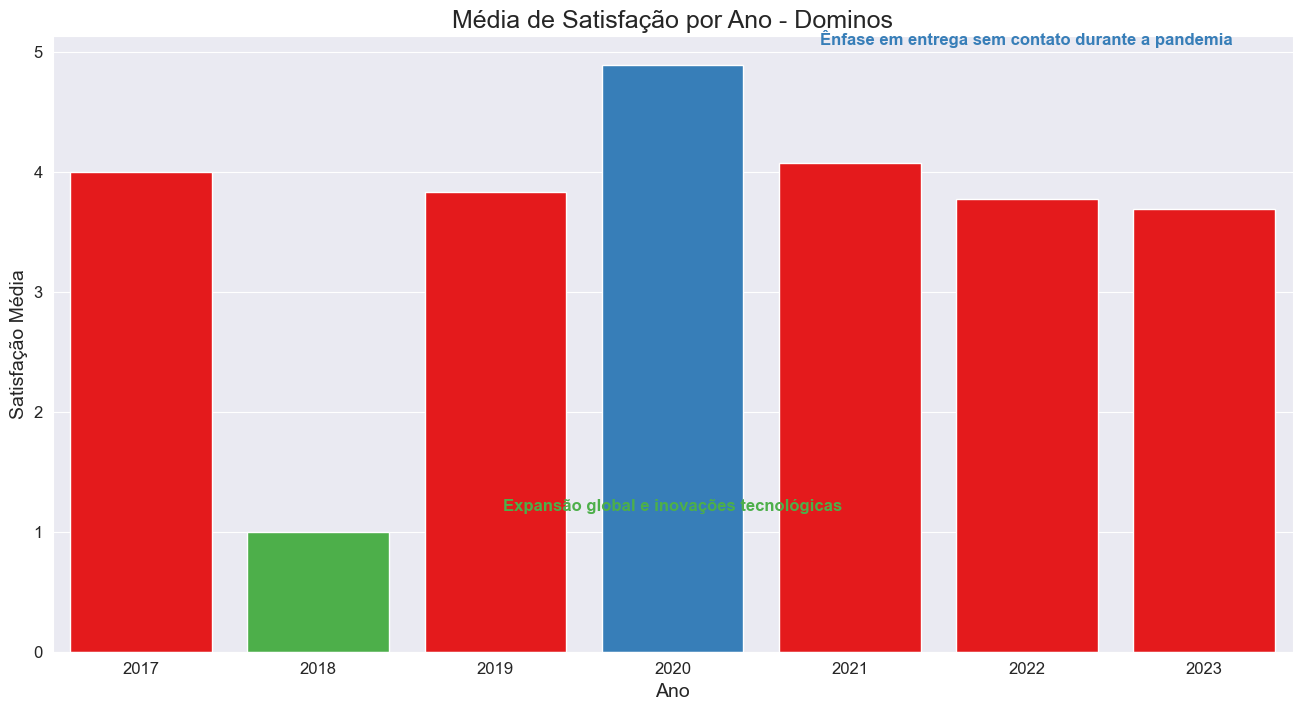

In [533]:
import seaborn as sns
import matplotlib.pyplot as plt

empresas = df['company'].unique()

for empresa in empresas:
    plt.figure(figsize=(16, 8))

    df_empresa = df[df['company'] == empresa]

    # Agrupar por ano e calcular a média de satisfação
    df_media = df_empresa.groupby('ano')['sentiment'].mean().reset_index()
    cores_eventos = sns.color_palette("Set1", n_colors=len(df_empresa['eventos'].unique()))

    # Barra da média de satisfação
    ax = sns.barplot(x='ano', y='sentiment', data=df_media, color='lightgray')

    # Eventos marcantes
    eventos = df_empresa[['ano', 'eventos']].dropna().drop_duplicates()
    for index, row in eventos.iterrows():
        cor_evento = cores_eventos[df_empresa['eventos'].unique().tolist().index(row['eventos'])]
        plt.annotate(row['eventos'], (row['ano'] - 2015, df_media.loc[df_media['ano'] == row['ano'], 'sentiment'].values[0]),
                     textcoords="offset points", xytext=(0, 15), ha='center', fontsize=12, color=cor_evento, fontweight='bold')
        barra_associada = df_media[df_media['ano'] == row['ano']].index[0]
        ax.patches[barra_associada].set_facecolor(cor_evento)

    plt.title(f'Média de Satisfação por Ano - {empresa}', fontsize=18)
    plt.xlabel('Ano', fontsize=14)
    plt.ylabel('Satisfação Média', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()


# Categorizando 

### Agrupamento de Eventos em Categorias:
###### Neste código, os eventos relatados foram agrupados em categorias mais amplas para abranger uma variedade de eventos relacionados às empresas. Esse agrupamento permitirá uma análise mais abrangente das ações e estratégias que podem afetar a satisfação do cliente. As categorias criadas abrangem uma gama de eventos, incluindo lançamentos de campanhas publicitárias, mudanças na estratégia de marketing, alterações na receita de produtos, aquisições de empresas rivais, medidas de sustentabilidade, respostas à pandemia e estratégias de marketing.

### Aqui estão as categorias criadas:

###### 1 -  Lançamento de Campanha Publicitária: Eventos relacionados ao lançamento de campanhas de marketing e publicidade para promover produtos ou marcas.

###### 2 -  Marketing: Eventos que envolvem mudanças nas estratégias de marketing, como foco em produtos com menos açúcar e calorias, anúncios polêmicos, e estratégias de marketing durante a pandemia.

###### 3 -  Acrescimo ou Remoção de Produto: Eventos que abrangem a introdução ou descontinuação de produtos, incluindo hambúrgueres vegetarianos, reformulação de produtos e alegações de redução de ingredientes.

###### 4 - Mudança de Receita: Eventos relacionados a mudanças na receita de produtos, como a remoção de conservantes artificiais ou antibióticos em alimentos.

###### 5 - Compra de Empresa Rival: Eventos que envolvem a aquisição de outras empresas, como cadeias de café ou empresas de suplementos alimentares.

###### 6 - Sustentabilidade: Eventos que demonstram compromissos com práticas sustentáveis, como o uso de ovos de galinhas criadas sem gaiolas e a eliminação de canudos de plástico.

###### 7 - Pandemia: Eventos relacionados às respostas das empresas à pandemia, incluindo fechamentos temporários de restaurantes.

###### 8 - Reposicionamento de Marca: Eventos que envolvem mudanças no nome e embalagem de produtos para refletir uma nova direção de marca.

###### 9 - Esse agrupamento de eventos em categorias amplas facilita a análise de tendências e correlações entre ações de empresas e a satisfação dos clientes.

In [82]:
def mapear_categoria(row):
    evento = row['eventos']

    if 'Lançamento da campanha' in evento:
        return 'Lançamento de campanha publicitária'
    elif 'Mudança na estratégia de marketing para produtos com menos açúcar e calorias' in evento:
        return 'Marketing'
    elif "Lançamento de campanhas como 'Pepsi Generations'" in evento:
        return 'Lançamento de campanha publicitaria'
    elif 'Descontinuação de marcas menos populares' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Anúncio do retorno da bebida Crystal Pepsi; Reformulação da Diet Pepsi' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Reformulação da Diet Pepsi' in evento:
        return 'Mudança de receita'
    elif 'Comercial polêmico com Kendall Jenner' in evento:
        return 'Marketing'
    elif 'Lançamento de campanhas como "Pepsi Generations"' in evento:
        return 'Lançamento de campanha publicitária'
    elif 'Mudança de nome e embalagem de Tia Jemima para Pearl Milling Company' in evento:
        return 'Reposicionamento de marca'
    elif 'Lançamento do programa "All Day Breakfast"' in evento:
        return 'Lançamento de campanha publicitária'
    elif 'Mudança para ovos de galinhas criadas sem gaiolas nos restaurantes dos EUA e Canadá' in evento:
        return 'Sustentabilidade'
    elif 'Lançamento do programa "All Day Breakfast" nos EUA' in evento:
        return 'Lançamento de campanha publicitária'
    elif 'Compromisso com embalagens sustentáveis' in evento:
        return 'Sustentabilidade'
    elif 'Lançamento do novo hambúrguer vegetariano "Whopper Vegetariano" no Reino Unido' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Aquisição da cadeia canadense de café Tim Hortons por US $ 11 bilhões' in evento:
        return 'Compra de empresa rival'
    elif 'Lançamento da campanha "Google Home of the Whopper"' in evento:
        return 'Lançamento de campanha publicitária'
    elif 'Introdução do hambúrguer à base de plantas "Impossible Whopper"' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Teste de um hambúrguer vegetariano à base de plantas em alguns mercados dos EUA' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Estratégias de marketing durante a pandemia' in evento:
        return 'Marketing'
    elif 'Retorno do Coronel Sanders como mascote' in evento:
        return 'Marketing'
    elif 'Lançamento do novo sanduíche de frango frito "Double Down Dog" nas Filipinas' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Mudança na receita de frango para remover antibióticos importantes para humanos até o final de 2018' in evento:
        return 'Mudança de receita'
    elif 'Problemas de fornecimento de frango no Reino Unido' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Suspensão temporária do slogan "Finger Lickin\' Good" devido à pandemia COVID-19' in evento:
        return 'Marketing'
    elif 'Introdução do frango frito à base de plantas' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Lançamento da campanha "Flavor of Now"' in evento:
        return 'Lançamento de campanha publicitária'
    elif 'Remoção de conservantes artificiais e sabores artificiais dos ingredientes até o final de julho daquele ano' in evento:
        return 'Mudança de receita'
    elif 'Foco em tecnologia, incluindo pedidos online' in evento:
        return 'Marketing'
    elif 'Fechamento permanente de cerca de 300 restaurantes nos EUA' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Resposta à pandemia, com ênfase nas opções de entrega' in evento:
        return 'Marketing'
    elif 'Remoção do ingrediente químico controverso azodicarbonamida do pão após uma petição online' in evento:
        return 'Mudança de receita'
    elif 'Mudança para carne sem antibióticos nos restaurantes dos EUA até o final daquele ano' in evento:
        return 'Mudança de receita'
    elif 'Mudança para ingredientes naturais e orgânicos' in evento:
        return 'Mudança de receita'
    elif 'Encerramento de lojas nos EUA, ajustando estratégias' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Processo por um grupo de clientes alegando que os sanduíches continham menos atum do que o anunciado' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Introdução de alternativas de carne à base de plantas' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Lançamento da nova bebida sazonal "Chestnut Praline Latte" nos EUA e no Canadá' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Expansão do programa "FoodShare" para doar alimentos não vendidos para bancos de alimentos locais nos EUA e no Canadá' in evento:
        return 'Lançamento de campanha publicitária'
    elif 'Fechamento de lojas para treinamento antirracial' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Foco em sustentabilidade, eliminando canudos de plástico' in evento:
        return 'Sustentabilidade'
    elif 'Fechamento temporário de cerca de metade de seus cafés nos EUA e no Canadá devido à pandemia COVID-19' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Resposta à pandemia, com foco em pedidos móveis e drive-thru' in evento:
        return 'Marketing'
    elif 'Compromisso em usar apenas ovos de galinhas criadas sem gaiolas em seus produtos em todo o mundo até 2025' in evento:
        return 'Sustentabilidade'
    elif 'Aquisição da Blue Bottle Coffee, uma empresa de café artesanal com sede em Oakland, Califórnia' in evento:
        return 'Compra de empresa rival'
    elif 'Aquisição da empresa de vitaminas e suplementos alimentares Atrium Innovations por US 2,3 bilhões' in evento:
        return 'Compra de empresa rival'
    elif 'Venda do negócio de confeitos nos EUA para a Ferrero' in evento:
        return 'Compra de empresa rival'
    elif 'Lançamento de um programa de reciclagem de plásticos de US 2 bilhões para reduzir o desperdício de plástico e aumentar o uso de materiais reciclados em suas embalagens' in evento:
        return 'Sustentabilidade'
    elif 'Venda da unidade de água engarrafada nos EUA para a One Rock Capital Partners por US $ 4,3 bilhões' in evento:
        return 'Compra de empresa rival'
    elif 'Resposta à pandemia, destacando produtos essenciais' in evento:
        return 'Acrescimo ou remoção de produto'
    elif 'Lançamento da campanha "Emoji Ordering"' in evento:
        return 'Lançamento de campanha publicitária'
    elif 'Expansão global e inovações tecnológicas' in evento:
        return 'Marketing'
    elif 'Ênfase em entrega sem contato durante a pandemia' in evento:
        return 'Marketing'
    elif "Lançamento do programa 'All Day Breakfast' nos EUA" in evento:
        return 'Lançamento de campanha publicitaria'
    elif 'Ênfase em entrega sem contato durante a pandemia' in evento:
        return 'Marketing'
    elif 'Fechamento temporário de restaurantes em todo o mundo devido à pandemia COVID-19' in evento:
        return 'Pandemia'
    elif "Introdução do hambúrguer à base de plantas 'Impossible Whopper'" in evento:
        return 'Acrescimo ou remoção de produto'
    elif "Suspensão temporária do slogan 'Finger Lickin' Good' devido à pandemia COVID-19" in evento:
        return 'Marketing'
    else:
        return ''
    
df['categoria'] = df.apply(mapear_categoria, axis=1)

df

,company,sentiment,ano,dia_da_semana,mes,eventos,categoria
0,CocaCola,5,2023,Saturday,August,,
1,CocaCola,5,2023,Friday,May,,
2,CocaCola,5,2016,Saturday,November,Mudança na estratégia de marketing para produt...,Marketing
3,CocaCola,1,2022,Tuesday,March,,
4,CocaCola,1,2023,Friday,July,,
...,...,...,...,...,...,...,...
956,Dominos,5,2020,Wednesday,April,Ênfase em entrega sem contato durante a pandemia,Marketing
957,Dominos,5,2023,Monday,April,,
958,Dominos,1,2021,Tuesday,October,,
959,Dominos,5,2017,Sunday,August,,


In [83]:
df.to_csv('DadosColetados/dados_reddit4_Limpo_v2.csv', index=False)

In [84]:
import pandas as pd
df = pd.read_csv('DadosColetados/dados_reddit4_Limpo_v2.csv')
df

,company,sentiment,ano,dia_da_semana,mes,eventos,categoria
0,CocaCola,5,2023,Saturday,August,NaN,NaN
1,CocaCola,5,2023,Friday,May,NaN,NaN
2,CocaCola,5,2016,Saturday,November,Mudança na estratégia de marketing para produt...,Marketing
3,CocaCola,1,2022,Tuesday,March,NaN,NaN
4,CocaCola,1,2023,Friday,July,NaN,NaN
...,...,...,...,...,...,...,...
956,Dominos,5,2020,Wednesday,April,Ênfase em entrega sem contato durante a pandemia,Marketing
957,Dominos,5,2023,Monday,April,NaN,NaN
958,Dominos,1,2021,Tuesday,October,NaN,NaN
959,Dominos,5,2017,Sunday,August,NaN,NaN


# Criando Modelo

Valores ausentes:

In [85]:
# Remover a coluna 'eventos'
df = df.drop('eventos', axis=1)
# Preencher valores ausentes em 'categoria_evento'
df['categoria'].fillna('Categoria Padrão', inplace=True)
# Preencher valores ausentes em 'lag_satisfaction' com a média
#df['lag_satisfaction'].fillna(df['lag_satisfaction'].mean(), inplace=True)
# Verifique novamente valores ausentes em todo o DataFrame
print(df.isnull().sum())


company          0
sentiment        0
ano              0
dia_da_semana    0
mes              0
categoria        0
dtype: int64


Codificação Categórica:

In [74]:
df.columns

Index(['company', 'sentiment', 'ano', 'dia_da_semana', 'mes', 'categoria'], dtype='object')

### Pré-processamento e Normalização de Dados:
###### O trecho de código fornecido realiza o pré-processamento e normalização dos dados no DataFrame. Vamos entender o que está sendo feito em cada etapa:

### Label Encoding para 'dia_da_semana' e 'mes':

###### Utiliza o LabelEncoder para transformar as colunas 'dia_da_semana' e 'mes' em valores numéricos. Essa transformação é útil para algoritmos de aprendizado de máquina que requerem entradas numéricas.
### MinMax Scaling para 'ano' e 'sentiment':

###### Utiliza o MinMaxScaler para realizar a normalização das colunas 'ano' e 'sentiment'. A normalização é um processo importante para garantir que diferentes features estejam na mesma escala, o que pode melhorar o desempenho de algoritmos que são sensíveis à escala dos dados.
### Salvando os Encoders e Scalers:

###### Salva os objetos LabelEncoder e MinMaxScaler em arquivos usando o módulo joblib. Isso é útil para aplicar as mesmas transformações em dados futuros, garantindo consistência nos processos.
###### Resumidamente, esse trecho de código prepara os dados para análise posterior, garantindo que as features relevantes estejam em uma escala consistente e que variáveis categóricas estejam codificadas numericamente.

In [86]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import joblib

# Colunas para normalizar
colunas_para_normalizar_ano = ['ano']
colunas_para_normalizar_sentiment = ['sentiment']

# Inicializar o LabelEncoder para 'dia_da_semana'
label_encoder_dia = LabelEncoder()
df['dia_da_semana'] = label_encoder_dia.fit_transform(df['dia_da_semana'])
joblib.dump(label_encoder_dia, 'LabelEncoders/label_encoder_dia.pkl')

# Inicializar o LabelEncoder para 'mes'
label_encoder_mes = LabelEncoder()
df['mes'] = label_encoder_mes.fit_transform(df['mes'])
joblib.dump(label_encoder_mes, 'LabelEncoders/label_encoder_mes.pkl')

# Inicializar o scaler para 'ano'
scaler_ano = MinMaxScaler()
df[colunas_para_normalizar_ano] = scaler_ano.fit_transform(df[colunas_para_normalizar_ano])
joblib.dump(scaler_ano, 'Scalers/scaler_ano.pkl')

# Inicializar o scaler para 'sentiment'
scaler_sentiment = MinMaxScaler()
df[colunas_para_normalizar_sentiment] = scaler_sentiment.fit_transform(df[colunas_para_normalizar_sentiment])
joblib.dump(scaler_sentiment, 'Scalers/scaler_sentiment.pkl')


['scaler_sentiment.pkl']

Tratamento do Target 'satisfaction':

In [87]:
# Verifique valores ausentes em 'satisfaction'
print(df['sentiment'].isnull().sum())

0


In [88]:
df

,company,sentiment,ano,dia_da_semana,mes,categoria
0,CocaCola,1.0,1.000,2,1,Categoria Padrão
1,CocaCola,1.0,1.000,0,8,Categoria Padrão
2,CocaCola,1.0,0.125,2,9,Marketing
3,CocaCola,0.0,0.875,5,7,Categoria Padrão
4,CocaCola,0.0,1.000,0,5,Categoria Padrão
...,...,...,...,...,...,...
956,Dominos,1.0,0.625,6,0,Marketing
957,Dominos,1.0,1.000,1,0,Categoria Padrão
958,Dominos,0.0,0.750,5,10,Categoria Padrão
959,Dominos,1.0,0.250,3,1,Categoria Padrão


### Exibição das categorias contempladas:

In [90]:
df.categoria.value_counts()

categoria
Categoria Padrão                       772
Acrescimo ou remoção de produto         91
Marketing                               28
Compra de empresa rival                 17
Reposicionamento de marca               14
Sustentabilidade                        12
Lançamento de campanha publicitária      8
Pandemia                                 8
Lançamento de campanha publicitaria      7
Mudança de receita                       4
Name: count, dtype: int64

In [91]:
# Recalcula a coluna 'media_sentimento'
df['media_sentimento'] = df.groupby(['company', 'ano'])['sentiment'].transform('mean')

In [92]:
df.company.value_counts()

company
BurgerKing    98
Nestle        98
CocaCola      97
KFC           97
Starbucks     97
McDonalds     96
PizzaHut      95
Subway        95
Pepsi         94
Dominos       94
Name: count, dtype: int64

In [93]:
from sklearn.preprocessing import LabelEncoder

# Cria um objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplica o LabelEncoder para 'company' e 'categoria_evento'
df['company'] = label_encoder.fit_transform(df['company'])


In [13]:
import joblib
joblib.dump(label_encoder, 'LabelEncoders/label_encoder_company.pkl')

['label_encoder_company.pkl']

In [14]:
from sklearn.preprocessing import LabelEncoder

# Cria um objeto LabelEncoder
label_encoder = LabelEncoder()
df['categoria'] = label_encoder.fit_transform(df['categoria'])

In [15]:
import joblib
joblib.dump(label_encoder, 'LabelEncoders/label_encoder_categoria.pkl')

['label_encoder_categoria.pkl']

### A categoria 1 deve ser removida, pois foi gerada pelo encode para datas que nao tem eventos definidos

In [94]:
df.categoria.value_counts()

categoria
Categoria Padrão                       772
Acrescimo ou remoção de produto         91
Marketing                               28
Compra de empresa rival                 17
Reposicionamento de marca               14
Sustentabilidade                        12
Lançamento de campanha publicitária      8
Pandemia                                 8
Lançamento de campanha publicitaria      7
Mudança de receita                       4
Name: count, dtype: int64

In [18]:
df['satisfacao_do_cliente'] = df['media_sentimento']

### Análise Descritiva e Categorização da Satisfação do Cliente:
###### O código realiza a análise descritiva da coluna 'satisfacao_do_cliente' e em seguida, cria categorias com base na média.

Estatísticas Descritivas:
Utiliza o método describe() para obter estatísticas descritivas da coluna 'satisfacao_do_cliente', incluindo contagem, média, desvio padrão, mínimo, 25º percentil, mediana (50º percentil), 75º percentil e máximo.

In [19]:
# Estatísticas descritivas
descricao = df['satisfacao_do_cliente'].describe()
print(descricao)

count    961.000000
mean       0.630853
std        0.148742
min        0.000000
25%        0.555556
50%        0.633333
75%        0.708333
max        1.000000
Name: satisfacao_do_cliente, dtype: float64


Função de Categorização:
Define uma função chamada categorizar_satisfacao que recebe a média como parâmetro e retorna uma categoria ('Insatisfeito', 'Neutro' ou 'Satisfeito') com base em intervalos específicos.

In [20]:
def categorizar_satisfacao(media):
    if media < 0.55:
        return 'Insatisfeito'
    elif 0.55 <= media < 0.63:
        return 'Neutro'
    else:
        return 'Satisfeito'

# Aplicar a função para criar a coluna de categorias
df['satisfacao_do_cliente'] = df['satisfacao_do_cliente'].apply(categorizar_satisfacao)

In [21]:
df

,company,sentiment,ano,dia_da_semana,mes,categoria,media_sentimento,satisfacao_do_cliente
0,1,1.0,1.000,2,1,1,0.700000,Satisfeito
1,1,1.0,1.000,0,8,1,0.700000,Satisfeito
2,1,1.0,0.125,2,9,5,1.000000,Satisfeito
3,1,0.0,0.875,5,7,1,0.423077,Insatisfeito
4,1,0.0,1.000,0,5,1,0.700000,Satisfeito
...,...,...,...,...,...,...,...,...
956,2,1.0,0.625,6,0,5,0.972222,Satisfeito
957,2,1.0,1.000,1,0,1,0.671429,Satisfeito
958,2,0.0,0.750,5,10,1,0.767857,Satisfeito
959,2,1.0,0.250,3,1,1,0.750000,Satisfeito


In [22]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Aplicar o LabelEncoder à coluna 'satisfacao_do_cliente'
df['satisfacao_do_cliente'] = label_encoder.fit_transform(df['satisfacao_do_cliente'])

In [23]:
import joblib
joblib.dump(label_encoder, 'LabelEncoders/label_encoder_satisfacao_do_cliente.pkl')

['label_encoder_satisfacao_do_cliente.pkl']

In [24]:
df.to_csv('DadosColetados/dados_reddit4_v2.csv', index=False)

In [65]:
df = pd.read_csv('DadosColetados/dados_reddit4_v2.csv')

In [66]:
df.head()

,company,sentiment,ano,dia_da_semana,mes,categoria,media_sentimento,satisfacao_do_cliente
0,1,1.0,1.000,2,1,1,0.700000,2
1,1,1.0,1.000,0,8,1,0.700000,2
2,1,1.0,0.125,2,9,5,1.000000,2
3,1,0.0,0.875,5,7,1,0.423077,0
4,1,0.0,1.000,0,5,1,0.700000,2


## Descrição Geral:

###### Este trecho de código utiliza a biblioteca TensorFlow para criar e treinar um modelo de rede neural artificial para classificação multiclasse. O objetivo é prever a satisfação do cliente com base em diferentes características, como empresa, dia da semana, ano, mês e categoria de evento.

### Passos principais realizados:

### Pré-processamento de Dados:

###### Filtra os dados para excluir registros com a categoria padrão (9), onde os eventos não estão classificados.
###### Garante que as colunas relevantes sejam do tipo float.
###### Aplica a codificação de rótulos (Label Encoding) para converter colunas categóricas em numéricas.
### Divisão de Dados:

###### Divide os dados em conjuntos de treinamento e teste.
### Construção do Modelo:

###### Utiliza uma arquitetura de rede neural sequencial com camadas densas.
###### Adiciona camadas de dropout para evitar overfitting.
###### Usa a função de ativação softmax na camada de saída para lidar com a classificação multiclasse.
### Compilação do Modelo:

###### Compila o modelo usando o otimizador 'adam' e a função de perda 'sparse_categorical_crossentropy'.
### Treinamento do Modelo:

###### Treina o modelo com um conjunto de treinamento, usando o monitoramento de perda no conjunto de validação para aplicar o critério de parada antecipada.
### Avaliação do Modelo:

###### Avalia o desempenho do modelo no conjunto de teste.
###### Calcula métricas como acurácia, precisão e recall usando funções do sklearn.metrics.
### Saída de Resultados:

###### Imprime as métricas de avaliação, incluindo acurácia, precisão e recall.

# Aprendizado V1 = leva em consideração os parametros ['company', 'dia_da_semana', 'ano', 'mes', 'categoria'] como entrada

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = df[df['categoria'] != 9] #9 É a categoria padrao, onde nao tem eventos classificados

# Garantir que todas as colunas relevantes sejam do tipo float
df = df.astype({'satisfacao_do_cliente': float, 'ano': float, 'dia_da_semana': float,
                'mes': float, 'media_sentimento': float})

# Converter colunas categóricas para numéricas (Label Encoding)
label_encoder = LabelEncoder()
df['company'] = label_encoder.fit_transform(df['company'])
df['categoria'] = label_encoder.fit_transform(df['categoria'])
df['satisfacao_do_cliente'] = label_encoder.fit_transform(df['satisfacao_do_cliente'])

X = df[['company', 'dia_da_semana', 'ano', 'mes', 'categoria']]
y = df['satisfacao_do_cliente']

# conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construa o modelo
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Saída softmax para classificação multiclasse

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')

Epoch 1/500
19/19 - 1s - loss: 1.2514 - accuracy: 0.4086 - val_loss: 1.0437 - val_accuracy: 0.5197 - 821ms/epoch - 43ms/step
Epoch 2/500
19/19 - 0s - loss: 1.0635 - accuracy: 0.4975 - val_loss: 1.0318 - val_accuracy: 0.4803 - 62ms/epoch - 3ms/step
Epoch 3/500
19/19 - 0s - loss: 1.0072 - accuracy: 0.5321 - val_loss: 1.0225 - val_accuracy: 0.5132 - 61ms/epoch - 3ms/step
Epoch 4/500
19/19 - 0s - loss: 1.0153 - accuracy: 0.5206 - val_loss: 1.0245 - val_accuracy: 0.5197 - 63ms/epoch - 3ms/step
Epoch 5/500
19/19 - 0s - loss: 1.0039 - accuracy: 0.5535 - val_loss: 1.0254 - val_accuracy: 0.4934 - 66ms/epoch - 3ms/step
Epoch 6/500
19/19 - 0s - loss: 0.9753 - accuracy: 0.5321 - val_loss: 1.0192 - val_accuracy: 0.5132 - 73ms/epoch - 4ms/step
Epoch 7/500
19/19 - 0s - loss: 0.9732 - accuracy: 0.5601 - val_loss: 1.0231 - val_accuracy: 0.5132 - 66ms/epoch - 3ms/step
Epoch 8/500
19/19 - 0s - loss: 0.9789 - accuracy: 0.5453 - val_loss: 1.0125 - val_accuracy: 0.5263 - 63ms/epoch - 3ms/step
Epoch 9/500
19

# Aprendizado V2 = leva em consideração os parametros ['company','categoria'] como entrada

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = df[df['categoria'] != 9] #9 É a categoria padrao, onde nao tem eventos classificados

# Garantir que todas as colunas relevantes sejam do tipo float
df = df.astype({'satisfacao_do_cliente': float, 'ano': float, 'dia_da_semana': float,
                'mes': float, 'media_sentimento': float})

X = df[['company','categoria']]
y = df['satisfacao_do_cliente']

# conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Saída softmax para classificação multiclasse

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')

Epoch 1/500
19/19 - 1s - loss: 1.1669 - accuracy: 0.4399 - val_loss: 1.0361 - val_accuracy: 0.5197 - 872ms/epoch - 46ms/step
Epoch 2/500
19/19 - 0s - loss: 1.0783 - accuracy: 0.4959 - val_loss: 1.0142 - val_accuracy: 0.5000 - 64ms/epoch - 3ms/step
Epoch 3/500
19/19 - 0s - loss: 1.0329 - accuracy: 0.5206 - val_loss: 1.0212 - val_accuracy: 0.5197 - 64ms/epoch - 3ms/step
Epoch 4/500
19/19 - 0s - loss: 1.0058 - accuracy: 0.5502 - val_loss: 1.0188 - val_accuracy: 0.5197 - 65ms/epoch - 3ms/step
Epoch 5/500
19/19 - 0s - loss: 0.9884 - accuracy: 0.5601 - val_loss: 1.0109 - val_accuracy: 0.5197 - 63ms/epoch - 3ms/step
Epoch 6/500
19/19 - 0s - loss: 0.9776 - accuracy: 0.5585 - val_loss: 0.9946 - val_accuracy: 0.5132 - 62ms/epoch - 3ms/step
Epoch 7/500
19/19 - 0s - loss: 0.9493 - accuracy: 0.5783 - val_loss: 1.0085 - val_accuracy: 0.5395 - 63ms/epoch - 3ms/step
Epoch 8/500
19/19 - 0s - loss: 0.9587 - accuracy: 0.5799 - val_loss: 0.9959 - val_accuracy: 0.5526 - 68ms/epoch - 4ms/step
Epoch 9/500
19

In [67]:
print(f'Total de dados para treino = { sum(df[df["categoria"] != 9].company.value_counts())}')

Total de dados para treino = 949


In [30]:
from sklearn.metrics import classification_report

report=classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

         0.0       0.57      0.71      0.63        42
         1.0       0.54      0.74      0.62        47
         2.0       0.83      0.59      0.69       101

    accuracy                           0.66       190
   macro avg       0.65      0.68      0.65       190
weighted avg       0.70      0.66      0.66       190


In [31]:
model.save('Modelos/modelo_satisfacaoV4.h5')

C:\Users\Joaov\DataspellProjects\T2_Cienci_De_Dados\venv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Classificar / Validar

### Descrição Geral:

### Carregamento do Modelo e Encoders:

###### Carrega o modelo de aprendizado de máquina previamente treinado (modelo_satisfacaoV4.h5) usando TensorFlow.
###### Carrega os encoders e scalers usados durante o pré-processamento dos dados de treinamento.
### Criação de Dados Sintéticos de Teste:

###### Gera dados sintéticos para duas empresas, McDonalds e Subway, incluindo informações como empresa, dia da semana, ano, mês, categoria do evento e sentimento associado.
### Pré-processamento dos Novos Dados:

###### Aplica os encoders e scalers carregados aos novos dados para prepará-los para a previsão.
###### Codifica variáveis categóricas, normaliza variáveis numéricas e transforma os dados em um formato adequado para o modelo.
### Realização de Previsões:

###### Utiliza o modelo carregado para realizar previsões sobre a satisfação do cliente com base nos novos dados.
### Mapeamento de Resultados:

###### Mapeia os valores de saída do modelo (y_pred_classes) para categorias compreensíveis, como 'Insatisfeito', 'Neutro' e 'Satisfeito'.
### Exibição de Resultados:

###### Exibe as categorias previstas para os dados sintéticos das empresas McDonalds e Subway.
### Exibição de Imagens:

###### Usa a biblioteca IPython para exibir imagens associadas às empresas Subway e McDonalds. e Comparar a satisfação prevista com a satisfação ocorrida no ano de 2016

In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib

# Carregue o modelo treinado
model = load_model('Modelos/modelo_satisfacaoV4.h5')

# Carregar os encoders e os scalers
scaler_ano = joblib.load('Scalers/scaler_ano.pkl')
scaler_sentiment = joblib.load('Scalers/scaler_sentiment.pkl')
encoder_company_categoria = joblib.load('LabelEncoders/label_encoder_company.pkl')
encoder_satisfacao_cliente = joblib.load('LabelEncoders/label_encoder_satisfacao_do_cliente.pkl')
encoder_dia = joblib.load('LabelEncoders/label_encoder_dia.pkl')
encoder_mes = joblib.load('LabelEncoders/label_encoder_mes.pkl')
encoder_categoria = joblib.load('LabelEncoders/label_encoder_categoria.pkl')

In [48]:
import pandas as pd
import numpy as np

# Criar um DataFrame sintético de teste para PizzaHut
novos_dados_pizza_hut = pd.DataFrame({
    'company': ['McDonalds'],
    'dia_da_semana': ['Monday'],
    'ano': [2016],
    'mes': ['August'],
    'categoria_evento': ['Lançamento de campanha publicitária'],
    'sentiment': [0.75]
})

# Criar um DataFrame sintético de teste para Subway
novos_dados_subway = pd.DataFrame({
    'company': ['Subway'],
    'dia_da_semana': ['Monday'],
    'ano': [2016],
    'mes': ['August'],
    'categoria_evento': ['Mudança de receita'],
    'sentiment': [0.75]
})

# Concatenar todos os novos dados em um único DataFrame
novos_dados = pd.concat([novos_dados_pizza_hut, novos_dados_subway], ignore_index=True)

# Exibir o DataFrame resultante
print(novos_dados)


     company dia_da_semana   ano     mes                     categoria_evento  \
0  McDonalds        Monday  2016  August  Lançamento de campanha publicitária   
1     Subway        Monday  2016  August                   Mudança de receita   

   sentiment  
0       0.75  
1       0.75  


In [49]:
# Aplicar os encoders e os scalers nos novos dados
novos_dados['dia_da_semana'] = encoder_dia.transform(novos_dados['dia_da_semana'])
novos_dados['mes'] = encoder_mes.transform(novos_dados['mes'])
novos_dados['categoria_evento'] = encoder_categoria.transform(novos_dados['categoria_evento'])
novos_dados['company'] = encoder_company_categoria.transform(novos_dados['company'])
novos_dados['ano'] = scaler_ano.transform(novos_dados[['ano']])
novos_dados['sentiment'] = scaler_sentiment.transform(novos_dados[['sentiment']])

In [50]:
# Extrair as features dos novos dados
X_novos = novos_dados[['company', 'categoria_evento']]

# Realizar previsões
y_pred = model.predict(X_novos)
y_pred_classes = y_pred.argmax(axis=-1)

1/1 [==============================] - 0s 19ms/step


In [51]:
# Mapear os valores de y_pred_classes para as categorias desejadas
categorias_mapeadas = {0: 'Insatisfeito', 1: 'Neutro', 2: 'Satisfeito'}
y_pred_categorias = [categorias_mapeadas[val] for val in y_pred_classes]

# Imprimir as categorias mapeadas
print(y_pred_categorias)


['Satisfeito', 'Insatisfeito']


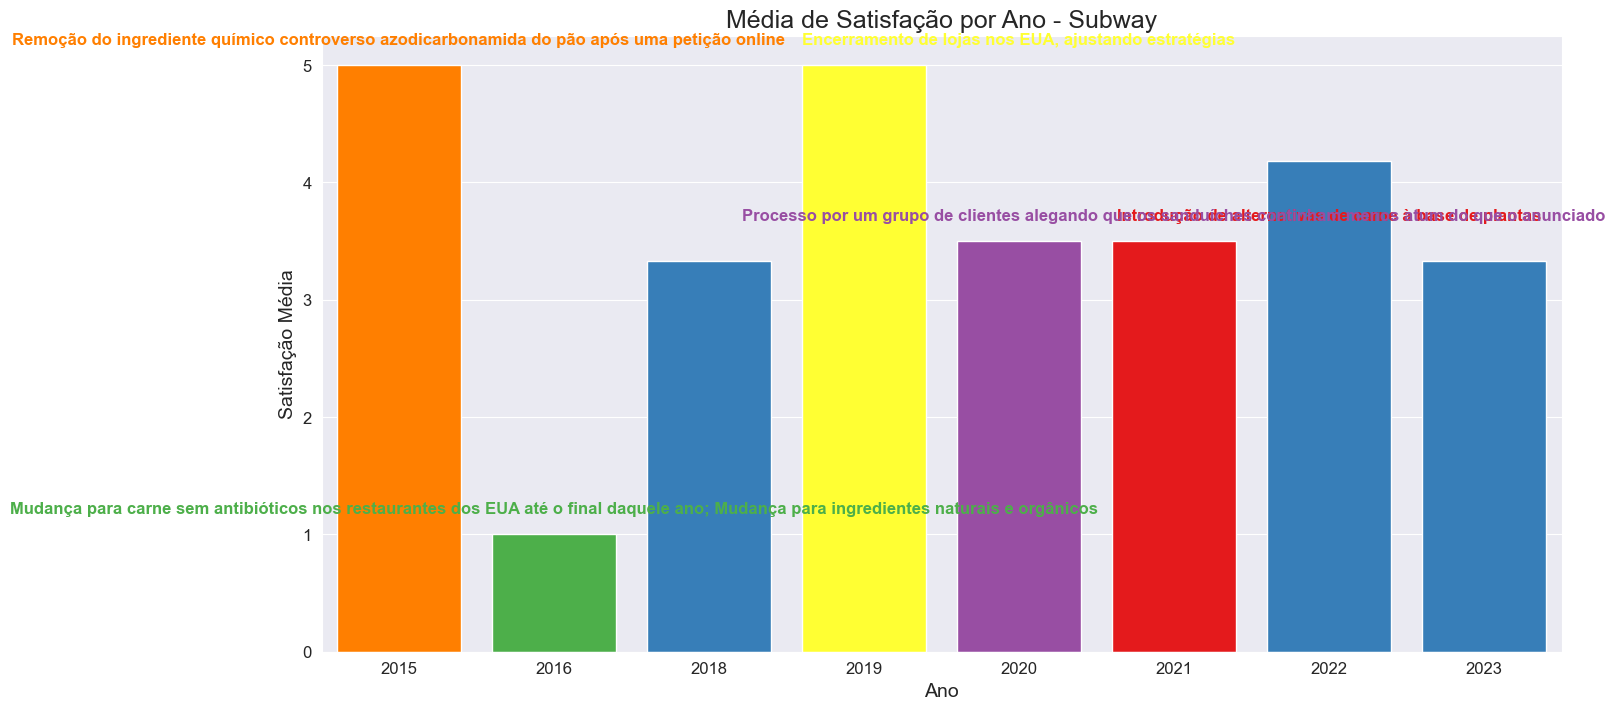

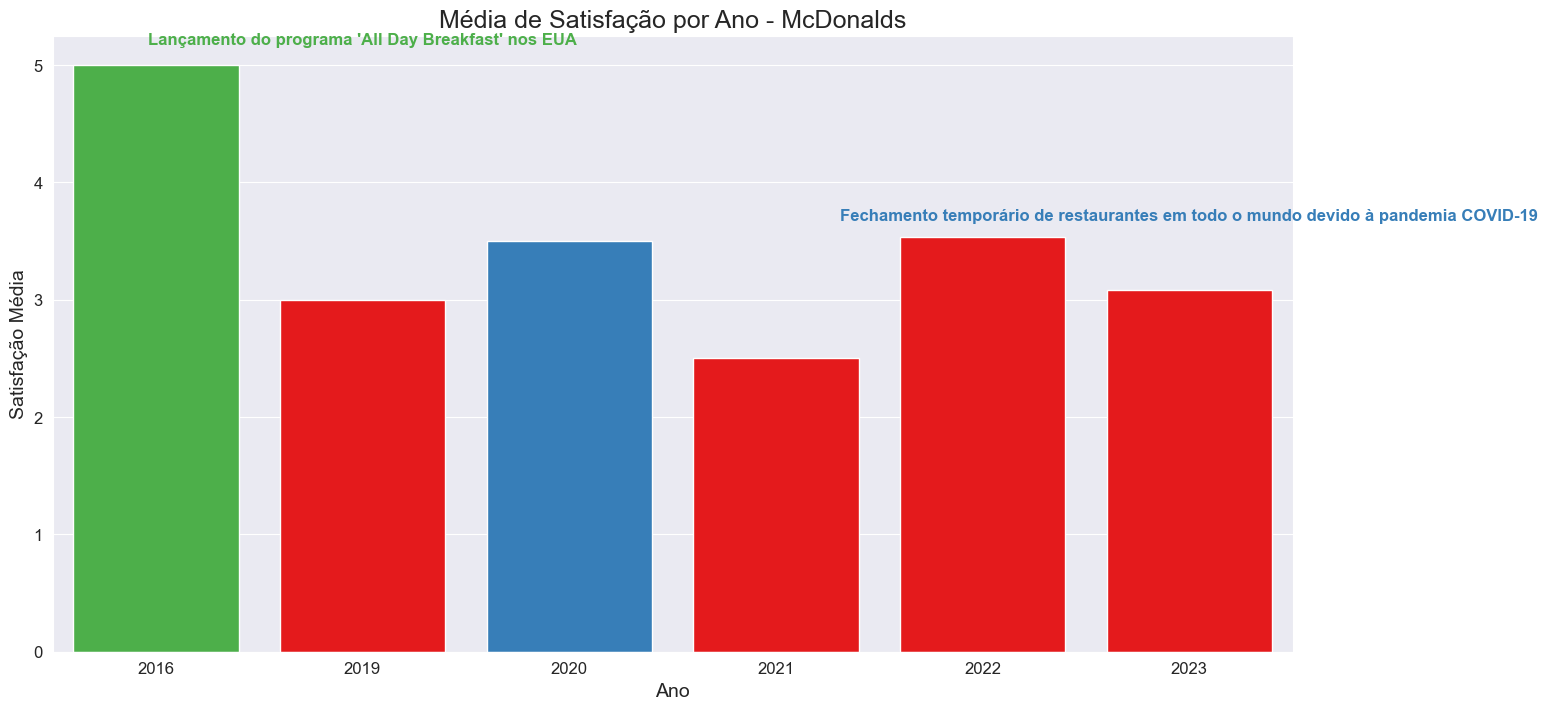

In [63]:
from IPython.display import Image, display

display(Image(filename='Imagens/Subway.png'))
display(Image(filename='Imagens/McDonalds.png'))


In [6]:
#@title **Avaliação**
Problema = 10 #@param {type:"slider", min:0, max:10, step:1}

Metodologia = 9 #@param {type:"slider", min:0, max:10, step:1}

Resultados = 6 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral_e_apresentacao = 7 #@param {type:"slider", min:0, max:10, step:1}


In [7]:
#@title **Nota Final**
nota = Problema + Metodologia + Resultados + Conclusao + Geral_e_apresentacao

nota = nota / 5

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,6):
    exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.8


,nome,nota
0,Joao vitor quirino Sarti,7.8
1,Matheus Rossini,7.8
2,Guilherme Costa,7.8
